In [44]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import EllipseCollection
from sklearn.preprocessing import scale
sns.set_style('darkgrid')

%matplotlib inline

In [45]:
def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

In [46]:
#chargement des données sur python
glob = pd.read_csv("global-data-on-sustainable-energy.csv", delimiter=',')
#afficher les 7 premières lignes
glob.head(7)

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   
5  Afghanistan  2005                                25.390894   
6  Afghanistan  2006                                30.718690   

   Access to clean fuels for cooking  \
0                               6.20   
1                               7.20   
2                               8.20   
3                               9.50   
4                              10.90   
5                              12.20   
6                              13.85   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      
5                                               7.51      
6                                               7.40      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   
5                                       9830000.0   
6                                      10620000.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   
5                                 0.34                             0.0   
6                                 0.20                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   
5                               0.59  ...   
6                               0.64  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    
5                                          252.06912    
6                                          304.42090    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                       

In [47]:
#summary
glob.describe()

Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        2718.000000      
mean                                          113.137498      
std                                           244.167256      
min                                             0.000000      
25%                                             3.540000      
50%                                            32.910000      
75%                                           112.210000      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    1.560000e+03   
mean                                     9.422400e+07   
std                                      2.981544e+08   
min                                      0.000000e+00   
25%                                      2.600000e+05   
50%                                      5.665000e+06   
75%                                      5.534750e+07   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3455.000000                  
mean                                           32.638165                  
std                                            29.894901                  
min                                             0.000000                  
25%                                             6.515000                  
50%                                            23.300000                  
75%                                            55.245000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3628.000000                     3523.000000   
mean                             70.365003                       13.450190   
std                             348.051866                       73.006623   
min                               0.000000                        0.000000   
25%                               0.290000                        0.000000   
50%                               2.970000                        0.000000   
75%                              26.837500                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3628.000000   
mean                           23.968010   
std                           104.431085   
min                             0.000000   
25%                             0.040000   
50%                             1.470000   
75%                             9.600000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3607.000000   
mean                                36.801182   
std                                 34.31488

Les données montrent que pour la variable "Renewable.electricity.generating.capacity.per.capita," il y a 931 valeurs manquantes (NA's), ce qui pourrait affecter la qualité des analyses énergétiques ou économiques. De plus, pour "Value CO2 emissions kt by country," il y a 428 valeurs manquantes, suggérant des lacunes significatives dans les données des émissions de CO2, ce qui peut entraver les efforts de modélisation précise des impacts environnementaux ou des politiques climatiques. Ces absences requièrent une attention particulière pour le traitement des données ou la révision des sources pour améliorer l'exactitude des études futures.

In [48]:
#types des variables
glob.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [49]:
glob.iloc[:,17].value_counts()

25    147
18    113
4     105
26     63
17     63
     ... 
67     21
31     21
35     21
50     21
38     21
Name: Density\n(P/Km2), Length: 124, dtype: int64

In [50]:
glob['Year'].value_counts()

2020    175
2019    175
2018    175
2017    175
2016    175
2015    175
2014    175
2013    175
2011    174
2012    174
2010    174
2009    174
2008    174
2007    174
2000    173
2001    172
2006    172
2005    172
2004    172
2003    172
2002    172
Name: Year, dtype: int64

In [51]:
name = 'Density\\n(P/Km2)'
glob[name] = glob[name].str.replace(',','.')
glob[name] = glob[name].astype("float")
glob[name][1]


60.0

In [52]:
glob['Year'] = glob['Year'].astype('category')
glob['Density\\n(P/Km2)']= glob['Density\\n(P/Km2)'].astype('float')
glob.dtypes

Entity                                                                object
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from fossil fuels (TWh)                                  float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64

In [53]:
print(glob.shape)
n_ligne, n_col= glob.shape

(3649, 21)


In [54]:

total_missing = glob.isna().sum().sum()
total_values = glob.size

print("Nombre total de missing data: ", total_missing)
print("Pourcentage total de missing data: {:.2f}%".format((total_missing / total_values) * 100))
print()

missing_per_column = glob.isna().sum()
percent_missing_per_column = (missing_per_column / glob.shape[0]) * 100



print("Pourcentage de missing data pour chaque variable:")
print(percent_missing_per_column)


Nombre total de missing data:  6978
Pourcentage total de missing data: 9.11%

Pourcentage de missing data pour chaque variable:
Entity                                                               0.000000
Year                                                                 0.000000
Access to electricity (% of population)                              0.274048
Access to clean fuels for cooking                                    4.631406
Renewable-electricity-generating-capacity-per-capita                25.513839
Financial flows to developing countries (US $)                      57.248561
Renewable energy share in the total final energy consumption (%)     5.316525
Electricity from fossil fuels (TWh)                                  0.575500
Electricity from nuclear (TWh)                                       3.453001
Electricity from renewables (TWh)                                    0.575500
Low-carbon electricity (% electricity)                               1.151000
Primary energy

Les données montrent que la variable "Renewables... equivalent primary energy." a le pourcentage de valeurs manquantes le plus élevé à environ 58.56%, suivi par "Financial flows to developing countries (US$)" à 57.25%. Cela indique que plus de la moitié des données pour ces indicateurs énergétiques et financiers sont absentes, ce qui peut limiter l'analyse de la transition énergétique durable et de l'aide financière aux pays en développement. En comparaison, "gdp_per_capita" a un pourcentage relativement plus faible de valeurs manquantes à 7.72%, suggérant une meilleure disponibilité des données pour cette variable par rapport aux autres variables évaluées.

In [55]:
names = ['Renewable-electricity-generating-capacity-per-capita'
           ,'Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)']
glob2 = glob.drop(names,axis=1)
# ici on supprime toutes les 3 variables contenant le plus de variables manquante. I.e les colonnes ci dessus 

In [56]:
glob_complet = glob2.dropna()
glob_complet.head(10)
#Ici notre objectif est de supprimer toutes les lignes contenant des variables manquantes.
#Pour obtenir à la fin un jeu de donné complet.

Entity  Year  Access to electricity (% of population)  \
3   Afghanistan  2003                                14.738506   
4   Afghanistan  2004                                20.064968   
5   Afghanistan  2005                                25.390894   
6   Afghanistan  2006                                30.718690   
7   Afghanistan  2007                                36.051010   
8   Afghanistan  2008                                42.400000   
9   Afghanistan  2009                                46.740050   
10  Afghanistan  2010                                42.700000   
11  Afghanistan  2011                                43.222020   
12  Afghanistan  2012                                69.100000   

    Access to clean fuels for cooking  \
3                                9.50   
4                               10.90   
5                               12.20   
6                               13.85   
7                               15.30   
8                               16.70   
9                               18.40   
10                              20.00   
11                              21.80   
12                              23.00   

    Renewable energy share in the total final energy consumption (%)  \
3                                               36.66                  
4                                               44.24                  
5                                               33.88                  
6                                               31.89                  
7                                               28.78                  
8                                               21.17                  
9                                               16.53                  
10                                              15.15                  
11                                              12.61                  
12                                              15.36                  

    Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3                                  0.31                             0.0   
4                                  0.33                             0.0   
5                                  0.34                             0.0   
6                                  0.20                             0.0   
7                                  0.20                             0.0   
8                                  0.19                             0.0   
9                                  0.16                             0.0   
10                                 0.19                             0.0   
11                                 0.18                             0.0   
12                                 0.14                             0.0   

    Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
3                                0.63                               67.021280   
4                                0.56                               62.921350   
5                                0.59                               63.440857   
6                                0.64                               76.190475   
7                                0.75                               78.947370   
8                                0.54                               73.972600   
9                                0.78                               82.978720   
10                               0.75                               79.787230   
11                               0.60                               76.923090   
12                               0.74                               84.090910   

    Primary energy consumption per capita (kWh/person)  \
3                                           229.96822    
4                                           204.23125    
5                                           252.06912    
6                                           304.42090    
7                            

In [57]:

print(glob_complet.shape)
print(glob_complet.isna().sum())
glob_complet.head()

(2868, 18)
Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n

Entity  Year  Access to electricity (% of population)  \
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   
5  Afghanistan  2005                                25.390894   
6  Afghanistan  2006                                30.718690   
7  Afghanistan  2007                                36.051010   

   Access to clean fuels for cooking  \
3                               9.50   
4                              10.90   
5                              12.20   
6                              13.85   
7                              15.30   

   Renewable energy share in the total final energy consumption (%)  \
3                                              36.66                  
4                                              44.24                  
5                                              33.88                  
6                                              31.89                  
7                                              28.78                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3                                 0.31                             0.0   
4                                 0.33                             0.0   
5                                 0.34                             0.0   
6                                 0.20                             0.0   
7                                 0.20                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
3                               0.63                               67.021280   
4                               0.56                               62.921350   
5                               0.59                               63.440857   
6                               0.64                               76.190475   
7                               0.75                               78.947370   

   Primary energy consumption per capita (kWh/person)  \
3                                          229.96822    
4                                          204.23125    
5                                          252.06912    
6                                          304.42090    
7                                          354.27990    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3                                               1.40             
4                                               1.20             
5                                               1.41             
6                                               1.50             
7                                               1.53             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   
5                        1549.999952   11.229715      242.031313   
6                        1759.999990    5.357403      263.733602   
7                        1769.999981   13.826320      359.693158   

   Density\n(P/Km2)  Land Area(Km2)  Latitude  Longitude  
3              60.0        652230.0  33.93911  67.709953  
4              60.0        652230.0  33.93911  67.709953  
5              60.0        652230.0  33.93911  67.709953  
6              60.0        652230.0  33.93911  67.709953  
7              60.0        652230.0  33.93911  67.709953

# Analyse exploratoire

   Year  Renewable energy share in the total final energy consumption (%)
0  2000                                            5135.85               
1  2001                                            5064.46               
2  2002                                            5202.78               
3  2003                                            5184.23               
4  2004                                            5163.33               


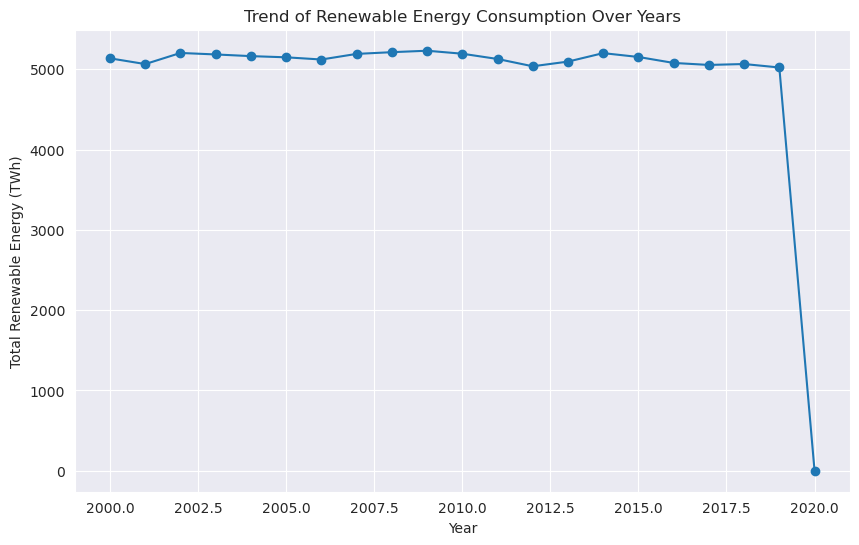

In [58]:
yearly_data = glob_complet.groupby('Year')['Renewable energy share in the total final energy consumption (%)'].sum().reset_index()



# Afficher les premières lignes du DataFrame
print(yearly_data.head())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Renewable energy share in the total final energy consumption (%)'], marker='o', linestyle='-')
plt.title('Trend of Renewable Energy Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy (TWh)')
plt.grid(True)
plt.show()

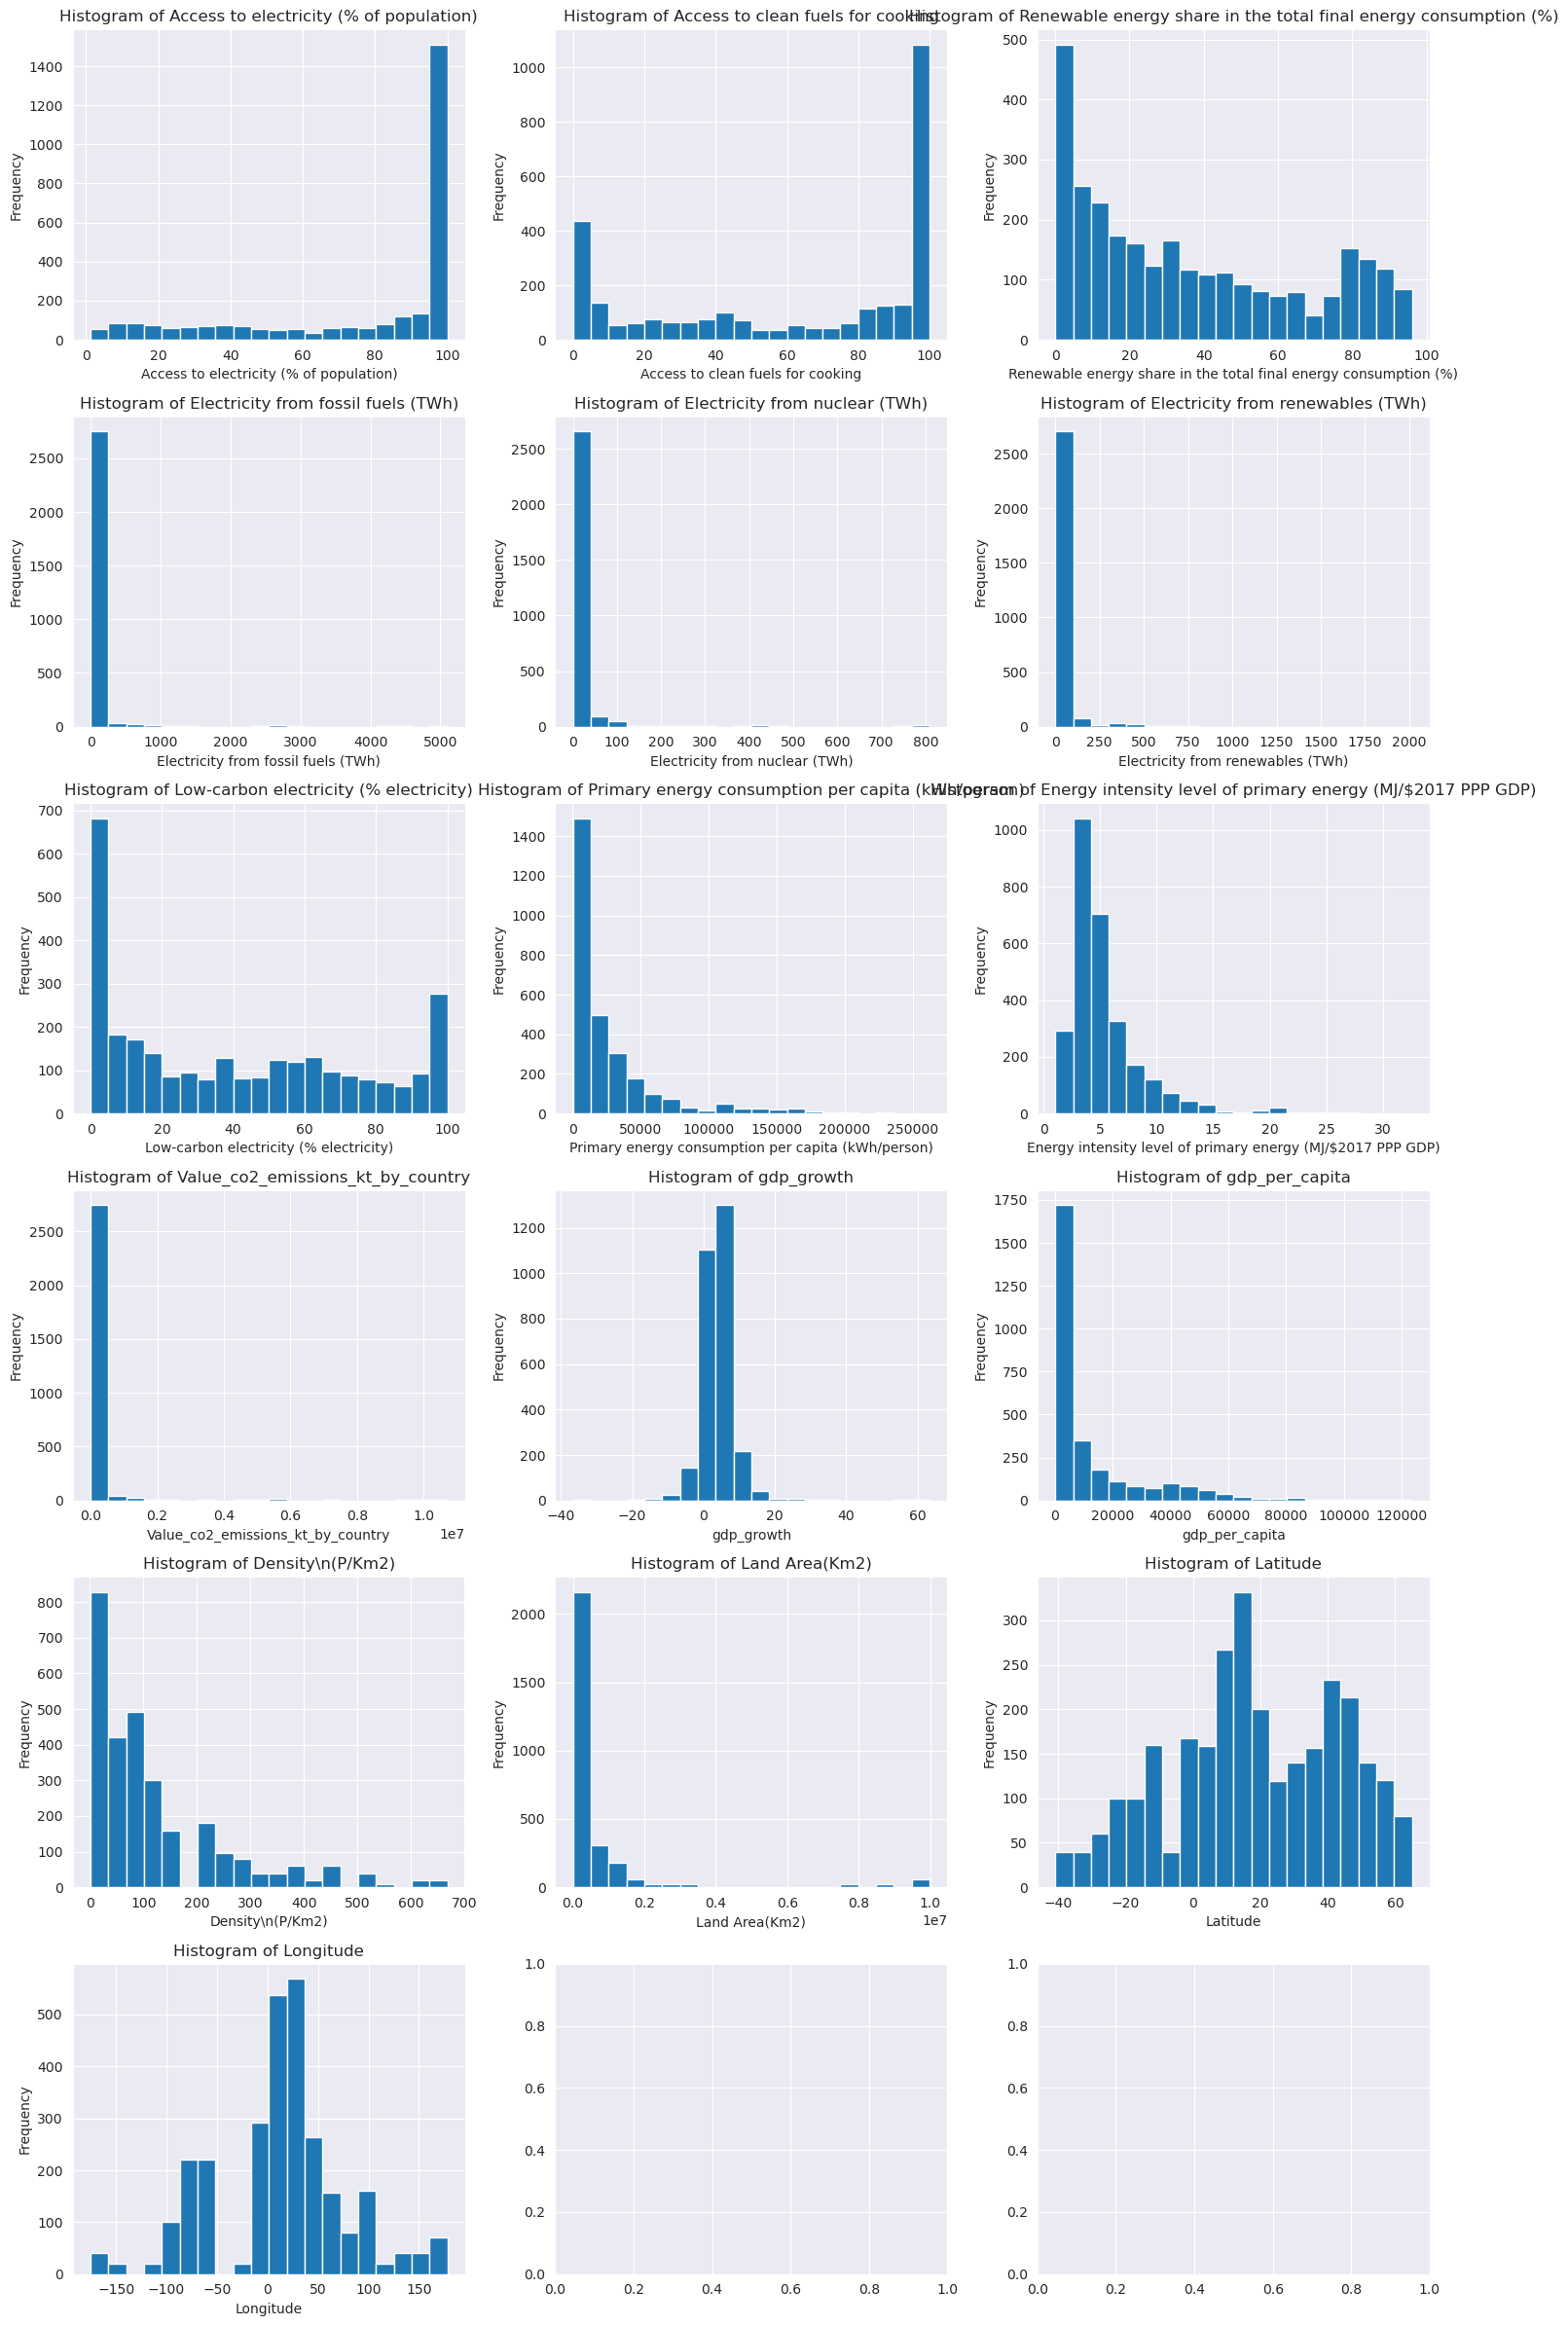

In [59]:
# Visualisation de la distribution de chaque variable numérique
numeric_cols = glob_complet.select_dtypes(include=['float64', 'int64']).columns
num_rows = len(numeric_cols)
num_plots_per_row = 3
num_total_rows = num_rows // num_plots_per_row
if num_rows % num_plots_per_row != 0:
    num_total_rows += 1

# Créer une grille de subplots pour les histogrammes
fig, axes = plt.subplots(nrows=num_total_rows, ncols=num_plots_per_row, figsize=(15, num_total_rows * 4))

# Afficher les histogrammes
for i, col in enumerate(numeric_cols):
    row = i // num_plots_per_row
    col_in_row = i % num_plots_per_row
    glob_complet[col].plot(kind='hist', bins=20, ax=axes[row, col_in_row])
    axes[row, col_in_row].set_title(f'Histogram of {col}')
    axes[row, col_in_row].set_xlabel(col)
    axes[row, col_in_row].set_ylabel('Frequency')
    if i==15:
        break

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()



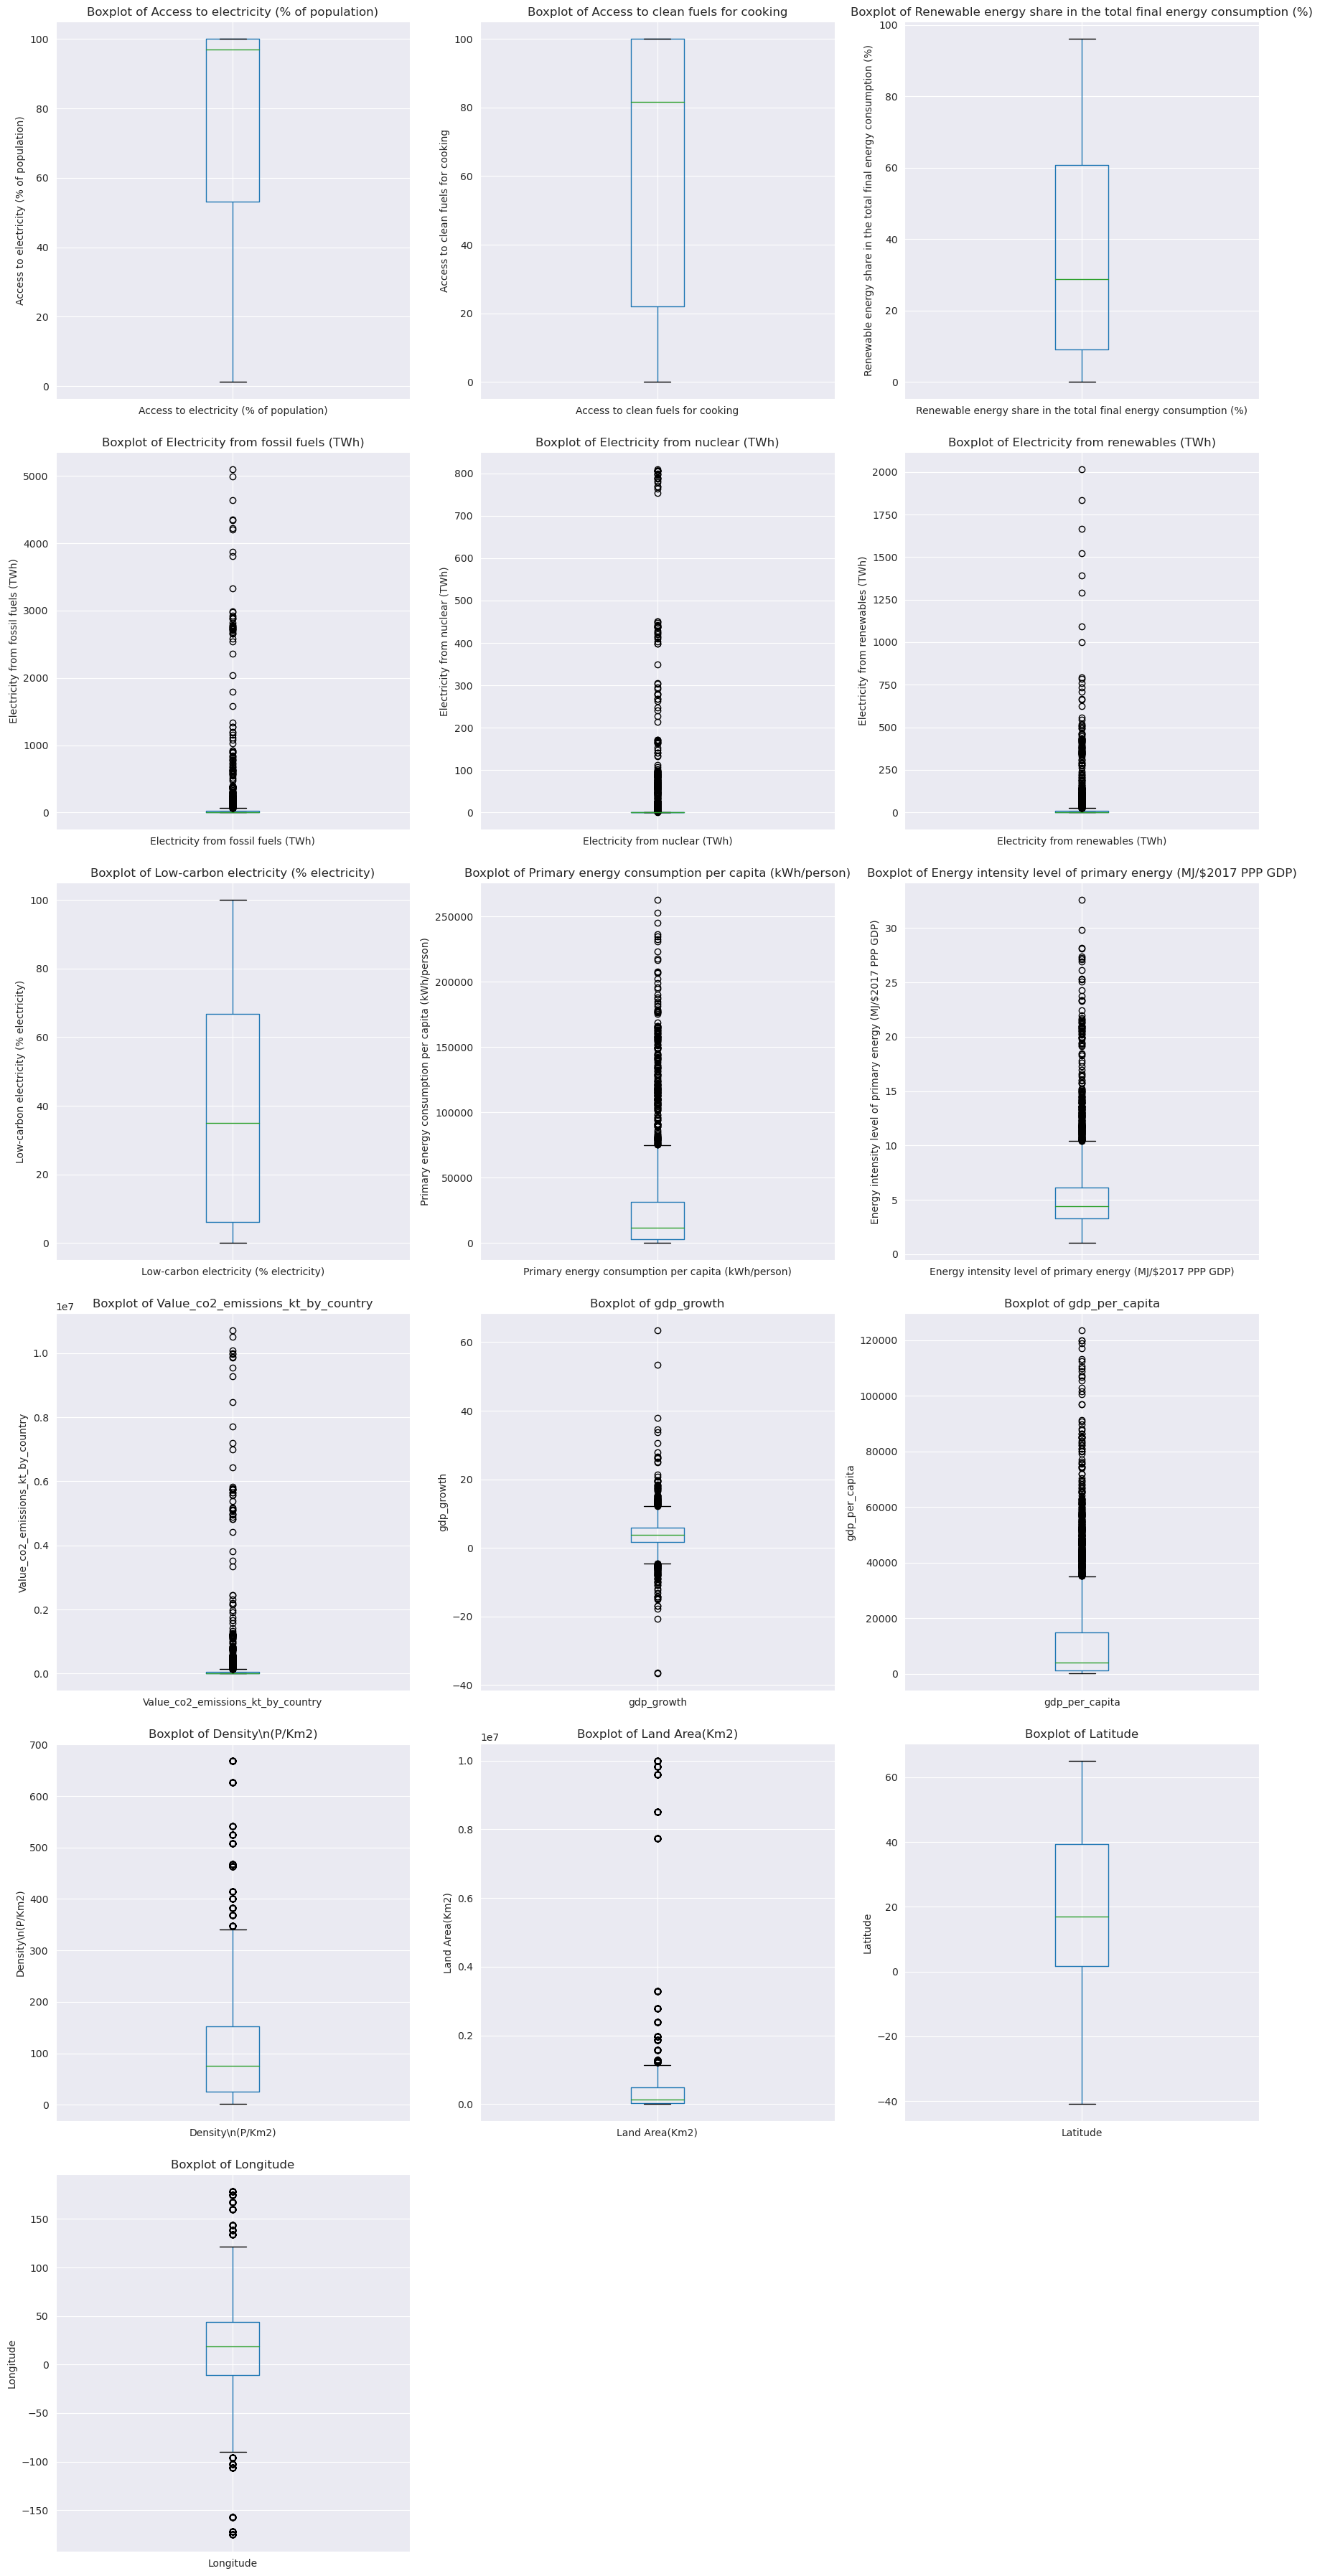

In [60]:
numeric_cols = glob_complet.select_dtypes(include=['float64', 'int64']).columns
num_rows = len(numeric_cols) // 3
if len(numeric_cols) % 3 != 0:
    num_rows += 1

# Créer une grille de subplots pour les boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

# Afficher les boxplots
for i, col in enumerate(numeric_cols):
    row = i // 3
    col_idx = i % 3
    glob_complet.boxplot(column=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_ylabel(col)

# Masquer les subplots vides s'il y a moins de 3 colonnes dans la dernière ligne
if len(numeric_cols) % 3 != 0:
    for col in range(len(numeric_cols) % 3, 3):
        fig.delaxes(axes[num_rows - 1, col])

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Supposons que votre DataFrame s'appelle glob_complet et que vous voulez centrer et mettre à l'échelle toutes les colonnes numériques
numeric_cols = glob_complet.select_dtypes(include=['float64', 'int64']).columns

# Centrer et mettre à l'échelle les données numériques
glob_scale = glob_complet[numeric_cols].copy()
glob_scale[numeric_cols] = scale.fit_transform(glob_complet[numeric_cols])
glob_scale_num = glob_scale[numeric_cols]
glob_scale.head()

Access to electricity (% of population)  Access to clean fuels for cooking  \
3                                -1.963065                          -1.342539   
4                                -1.793997                          -1.306853   
5                                -1.624946                          -1.273717   
6                                -1.455836                          -1.231659   
7                                -1.286582                          -1.194699   

   Renewable energy share in the total final energy consumption (%)  \
3                                           0.028580                  
4                                           0.281088                  
5                                          -0.064029                  
6                                          -0.130321                  
7                                          -0.233923                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
3                            -0.204041                       -0.194725   
4                            -0.203987                       -0.194725   
5                            -0.203961                       -0.194725   
6                            -0.204335                       -0.194725   
7                            -0.204335                       -0.194725   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
3                          -0.241340                                0.795146   
4                          -0.241990                                0.676131   
5                          -0.241712                                0.691211   
6                          -0.241247                                1.061314   
7                          -0.240225                                1.141343   

   Primary energy consumption per capita (kWh/person)  \
3                                          -0.697002    
4                                          -0.697696    
5                                          -0.696406    
6                                          -0.694995    
7                                          -0.693650    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3                                          -1.123384             
4                                          -1.179300             
5                                          -1.120588             
6                                          -1.095426             
7                                          -1.087039             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
3                          -0.204918    1.062898       -0.661410   
4                          -0.205151   -0.534190       -0.660305   
5                          -0.204515    1.579053       -0.658668   
6                          -0.204258    0.314777       -0.657509   
7                          -0.204246    2.138087       -0.652385   

   Density\n(P/Km2)  Land Area(Km2)  Latitude  Longitude  
3          -0.46531       -0.003482  0.633961   0.836135  
4          -0.46531       -0.003482  0.633961   0.836135  
5          -0.46531       -0.003482  0.633961   0.836135  
6          -0.46531       -0.003482  0.633961   0.836135  
7          -0.46531       -0.003482  0.633961   0.836135

In [62]:
# Data frame avec des noms simples
# Créer un dictionnaire pour mapper les nouveaux noms de colonnes
new_column_names = {
    'Access to electricity (% of population)': 'Access_electricity',
    'Access to clean fuels for cooking': 'Access_clean_fuels',
    'Renewable energy share in the total final energy consumption (%)': 'Renewable_energy_share',
    'Electricity from fossil fuels (TWh)': 'Electricity_fossil_fuels',
    'Electricity from nuclear (TWh)': 'Electricity_nuclear',
    'Electricity from renewables (TWh)': 'Electricity_renewables',
    'Low-carbon electricity (% electricity)': 'Low_carbon_electricity',
    'Primary energy consumption per capita (kWh/person)': 'Primary_energy_consumption',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'Energy_intensity',
    'Value_co2_emissions_kt_by_country': 'CO2_emissions',
    'gdp_growth': 'GDP_growth',
    'gdp_per_capita': 'GDP_per_capita',
    'Density\n(P/Km2)': 'Density',
    'Land Area(Km2)': 'Land_Area',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'
}

# Créer une copie du DataFrame avec les nouveaux noms de colonnes
glob_complet = glob_complet.rename(columns=new_column_names)
glob_complet.head()

Entity  Year  Access_electricity  Access_clean_fuels  \
3  Afghanistan  2003           14.738506                9.50   
4  Afghanistan  2004           20.064968               10.90   
5  Afghanistan  2005           25.390894               12.20   
6  Afghanistan  2006           30.718690               13.85   
7  Afghanistan  2007           36.051010               15.30   

   Renewable_energy_share  Electricity_fossil_fuels  Electricity_nuclear  \
3                   36.66                      0.31                  0.0   
4                   44.24                      0.33                  0.0   
5                   33.88                      0.34                  0.0   
6                   31.89                      0.20                  0.0   
7                   28.78                      0.20                  0.0   

   Electricity_renewables  Low_carbon_electricity  Primary_energy_consumption  \
3                    0.63               67.021280                   229.96822   
4                    0.56               62.921350                   204.23125   
5                    0.59               63.440857                   252.06912   
6                    0.64               76.190475                   304.42090   
7                    0.75               78.947370                   354.27990   

   Energy_intensity  CO2_emissions  GDP_growth  GDP_per_capita  \
3              1.40    1220.000029    8.832278      190.683814   
4              1.20    1029.999971    1.414118      211.382074   
5              1.41    1549.999952   11.229715      242.031313   
6              1.50    1759.999990    5.357403      263.733602   
7              1.53    1769.999981   13.826320      359.693158   

   Density\n(P/Km2)  Land_Area  Latitude  Longitude  
3              60.0   652230.0  33.93911  67.709953  
4              60.0   652230.0  33.93911  67.709953  
5              60.0   652230.0  33.93911  67.709953  
6              60.0   652230.0  33.93911  67.709953  
7              60.0   652230.0  33.93911  67.709953

In [63]:


# Créer une copie du DataFrame avec les nouveaux noms de colonnes
glob_scale = glob_scale.rename(columns=new_column_names)
glob_scale.head()

Access_electricity  Access_clean_fuels  Renewable_energy_share  \
3           -1.963065           -1.342539                0.028580   
4           -1.793997           -1.306853                0.281088   
5           -1.624946           -1.273717               -0.064029   
6           -1.455836           -1.231659               -0.130321   
7           -1.286582           -1.194699               -0.233923   

   Electricity_fossil_fuels  Electricity_nuclear  Electricity_renewables  \
3                 -0.204041            -0.194725               -0.241340   
4                 -0.203987            -0.194725               -0.241990   
5                 -0.203961            -0.194725               -0.241712   
6                 -0.204335            -0.194725               -0.241247   
7                 -0.204335            -0.194725               -0.240225   

   Low_carbon_electricity  Primary_energy_consumption  Energy_intensity  \
3                0.795146                   -0.697002         -1.123384   
4                0.676131                   -0.697696         -1.179300   
5                0.691211                   -0.696406         -1.120588   
6                1.061314                   -0.694995         -1.095426   
7                1.141343                   -0.693650         -1.087039   

   CO2_emissions  GDP_growth  GDP_per_capita  Density\n(P/Km2)  Land_Area  \
3      -0.204918    1.062898       -0.661410          -0.46531  -0.003482   
4      -0.205151   -0.534190       -0.660305          -0.46531  -0.003482   
5      -0.204515    1.579053       -0.658668          -0.46531  -0.003482   
6      -0.204258    0.314777       -0.657509          -0.46531  -0.003482   
7      -0.204246    2.138087       -0.652385          -0.46531  -0.003482   

   Latitude  Longitude  
3  0.633961   0.836135  
4  0.633961   0.836135  
5  0.633961   0.836135  
6  0.633961   0.836135  
7  0.633961   0.836135

In [64]:
"""# Visualisation de la distribution de chaque variable numérique
numeric_cols = glob_scale.select_dtypes(include=['float64', 'int64']).columns
num_rows = len(numeric_cols)
num_plots_per_row = 3
num_total_rows = num_rows // num_plots_per_row
if num_rows % num_plots_per_row != 0:
    num_total_rows += 1

# Créer une grille de subplots pour les histogrammes
fig, axes = plt.subplots(nrows=num_total_rows, ncols=num_plots_per_row, figsize=(15, num_total_rows * 4))

# Afficher les histogrammes
for i, col in enumerate(numeric_cols):
    row = i // num_plots_per_row
    col_in_row = i % num_plots_per_row
    glob_complet[col].plot(kind='hist', bins=20, ax=axes[row, col_in_row])
    axes[row, col_in_row].set_title(f'Histogram of {col}')
    axes[row, col_in_row].set_xlabel(col)
    axes[row, col_in_row].set_ylabel('Frequency')
    if i==15:
        break

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()
"""


"# Visualisation de la distribution de chaque variable numérique\nnumeric_cols = glob_scale.select_dtypes(include=['float64', 'int64']).columns\nnum_rows = len(numeric_cols)\nnum_plots_per_row = 3\nnum_total_rows = num_rows // num_plots_per_row\nif num_rows % num_plots_per_row != 0:\n    num_total_rows += 1\n\n# Créer une grille de subplots pour les histogrammes\nfig, axes = plt.subplots(nrows=num_total_rows, ncols=num_plots_per_row, figsize=(15, num_total_rows * 4))\n\n# Afficher les histogrammes\nfor i, col in enumerate(numeric_cols):\n    row = i // num_plots_per_row\n    col_in_row = i % num_plots_per_row\n    glob_complet[col].plot(kind='hist', bins=20, ax=axes[row, col_in_row])\n    axes[row, col_in_row].set_title(f'Histogram of {col}')\n    axes[row, col_in_row].set_xlabel(col)\n    axes[row, col_in_row].set_ylabel('Frequency')\n    if i==15:\n        break\n\n# Ajuster l'espacement entre les subplots\nplt.tight_layout()\n\n# Afficher les subplots\nplt.show()\n"

In [65]:
""" numeric_cols = glob_scale.select_dtypes(include=['float64', 'int64']).columns
num_rows = len(numeric_cols) // 3
if len(numeric_cols) % 3 != 0:
    num_rows += 1

# Créer une grille de subplots pour les boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))

# Afficher les boxplots
for i, col in enumerate(numeric_cols):
    row = i // 3
    col_idx = i % 3
    glob_scale.boxplot(column=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_ylabel(col)

# Masquer les subplots vides s'il y a moins de 3 colonnes dans la dernière ligne
if len(numeric_cols) % 3 != 0:
    for col in range(len(numeric_cols) % 3, 3):
        fig.delaxes(axes[num_rows - 1, col])

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher les subplots
plt.show()"""

" numeric_cols = glob_scale.select_dtypes(include=['float64', 'int64']).columns\nnum_rows = len(numeric_cols) // 3\nif len(numeric_cols) % 3 != 0:\n    num_rows += 1\n\n# Créer une grille de subplots pour les boxplots\nfig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 6))\n\n# Afficher les boxplots\nfor i, col in enumerate(numeric_cols):\n    row = i // 3\n    col_idx = i % 3\n    glob_scale.boxplot(column=col, ax=axes[row, col_idx])\n    axes[row, col_idx].set_title(f'Boxplot of {col}')\n    axes[row, col_idx].set_ylabel(col)\n\n# Masquer les subplots vides s'il y a moins de 3 colonnes dans la dernière ligne\nif len(numeric_cols) % 3 != 0:\n    for col in range(len(numeric_cols) % 3, 3):\n        fig.delaxes(axes[num_rows - 1, col])\n\n# Ajuster l'espacement entre les subplots\nplt.tight_layout()\n\n# Afficher les subplots\nplt.show()"

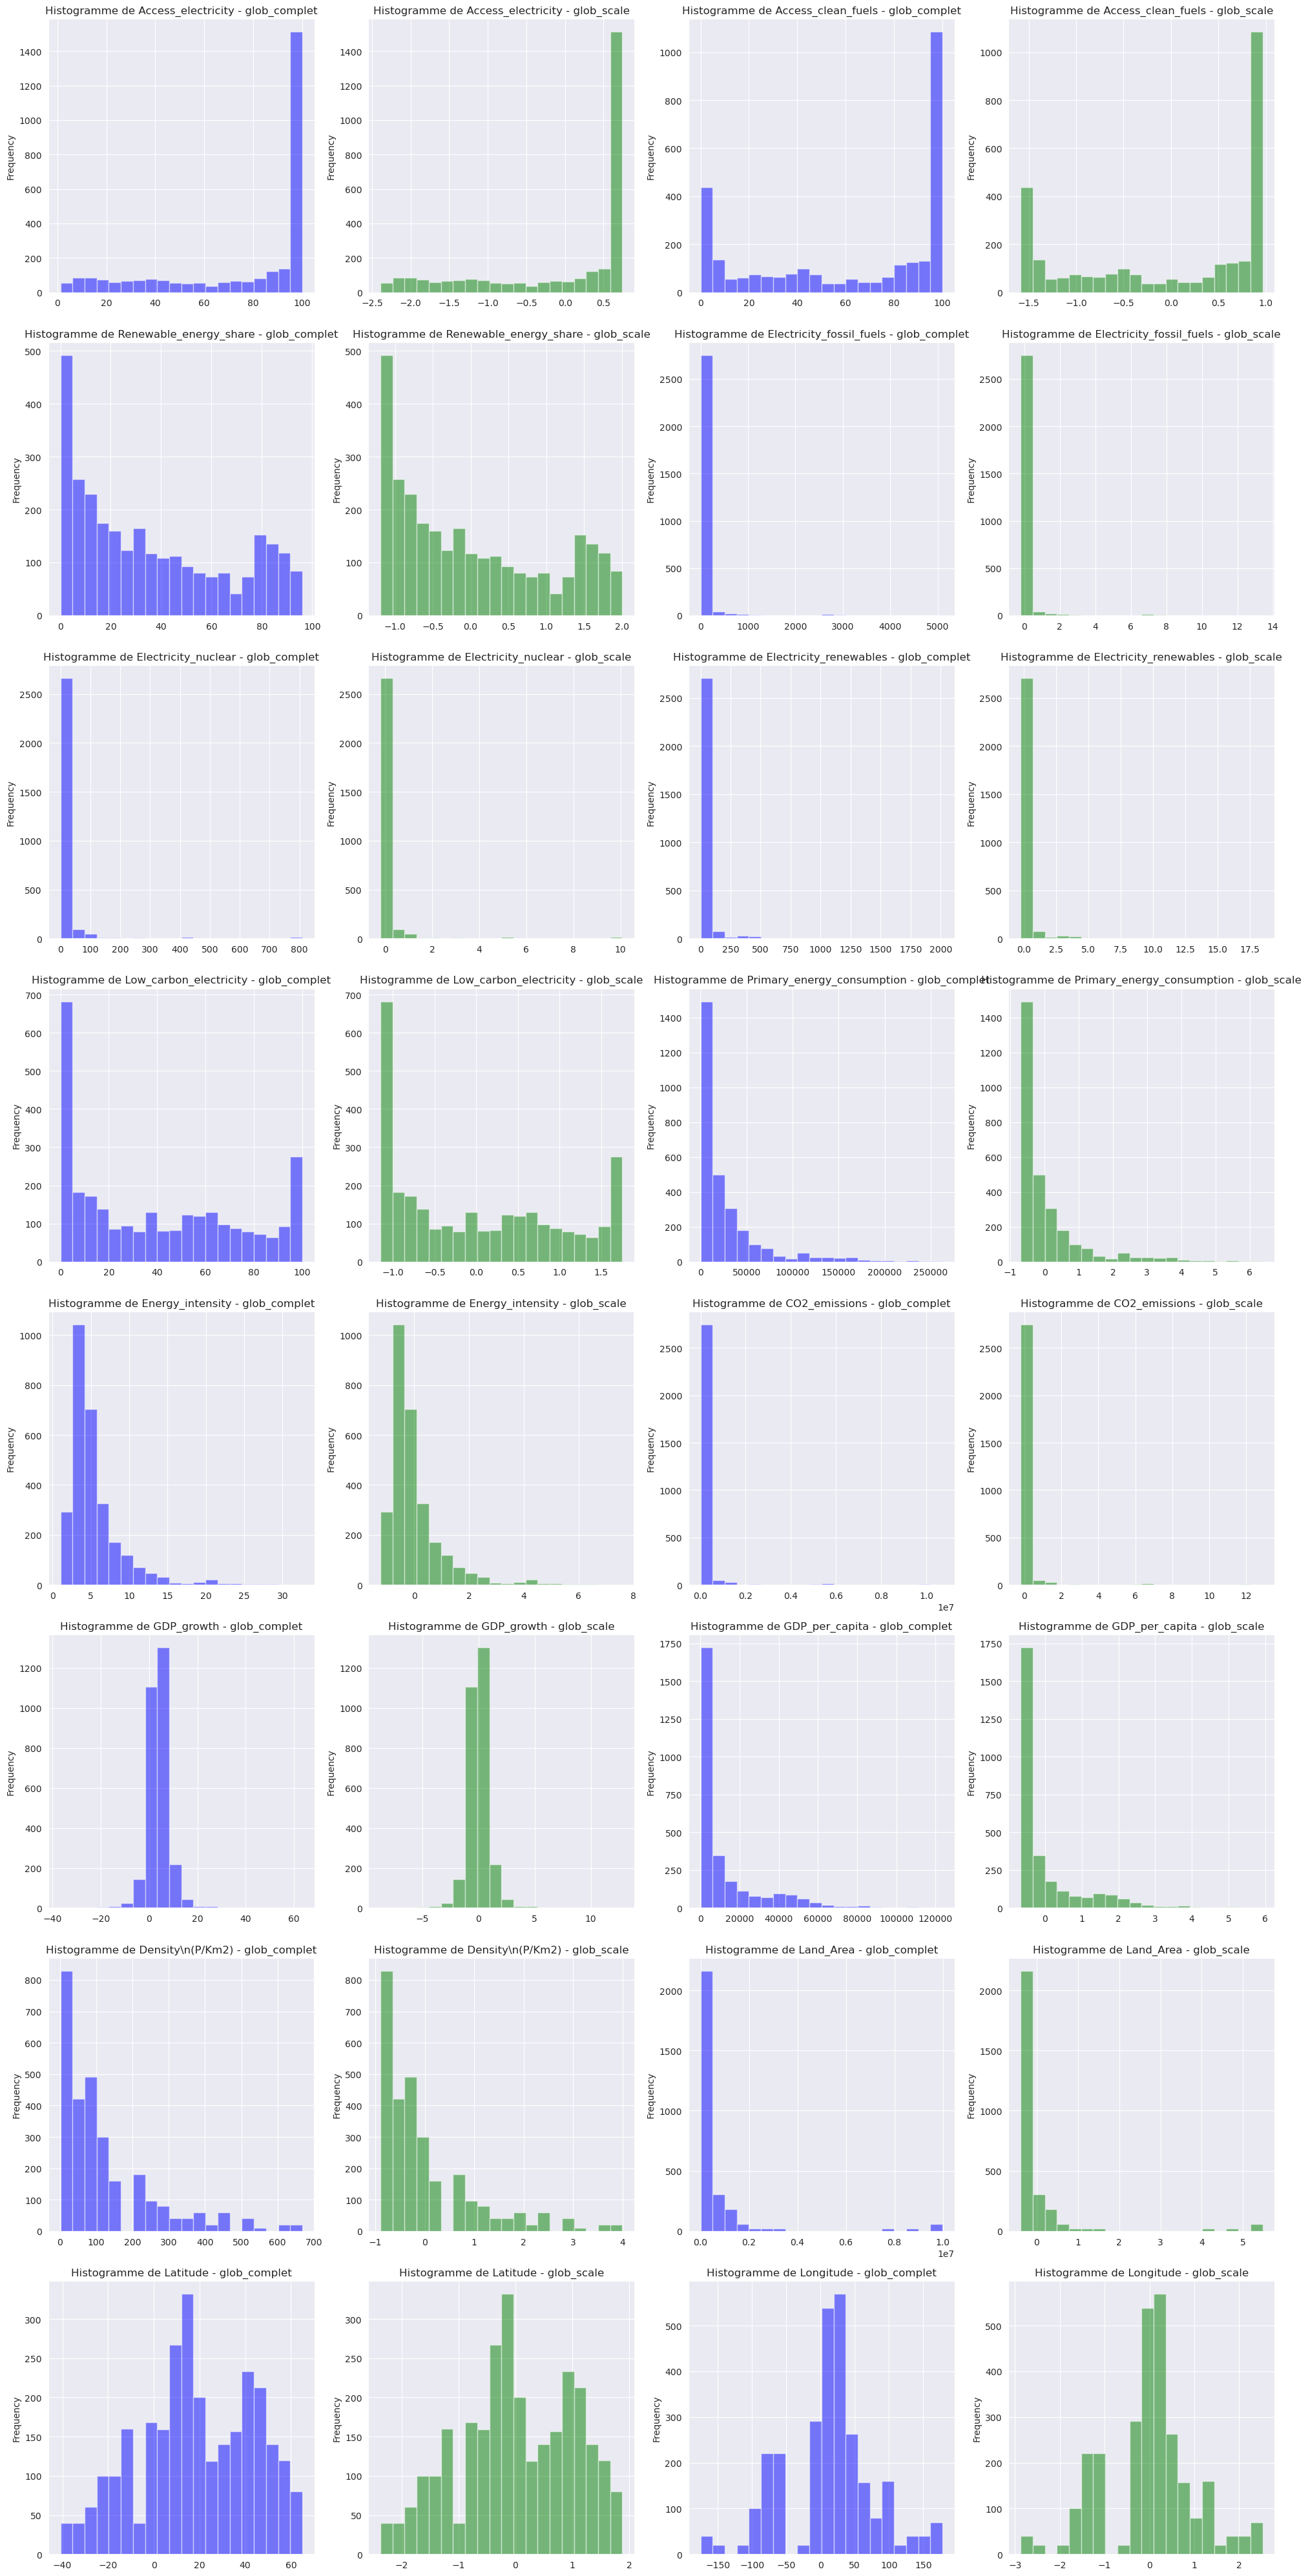

In [66]:
# Comparaison des histogrammes entre données centré et non centré
num_cols = 16
num_rows = num_cols // 2
if num_cols % 2 != 0:
    num_rows += 1

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, num_rows * 5))

# Récupérer les noms de colonnes numériques
numeric_cols_complet = glob_complet.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_scale = glob_scale.select_dtypes(include=['float64', 'int64']).columns

# Afficher les histogrammes
for i in range(num_cols):
    row = i // 2
    col = (i % 2) * 2
    col_complet = numeric_cols_complet[i]
    col_scale = numeric_cols_scale[i]

    # Histogramme de glob_complet
    glob_complet[col_complet].plot(kind='hist', bins=20, ax=axes[row, col], color='blue', alpha=0.5)
    axes[row, col].set_title(f'Histogramme de {col_complet} - glob_complet')

    # Histogramme de glob_scale
    glob_scale[col_scale].plot(kind='hist', bins=20, ax=axes[row, col + 1], color='green', alpha=0.5)
    axes[row, col + 1].set_title(f'Histogramme de {col_scale} - glob_scale')

# Supprimer les subplots vides s'il y a moins de colonnes dans la dernière ligne
if num_cols % 2 != 0:
    for col in range(num_cols % 2 * 2, 4):
        fig.delaxes(axes[num_rows - 1, col])

plt.tight_layout()
plt.show()

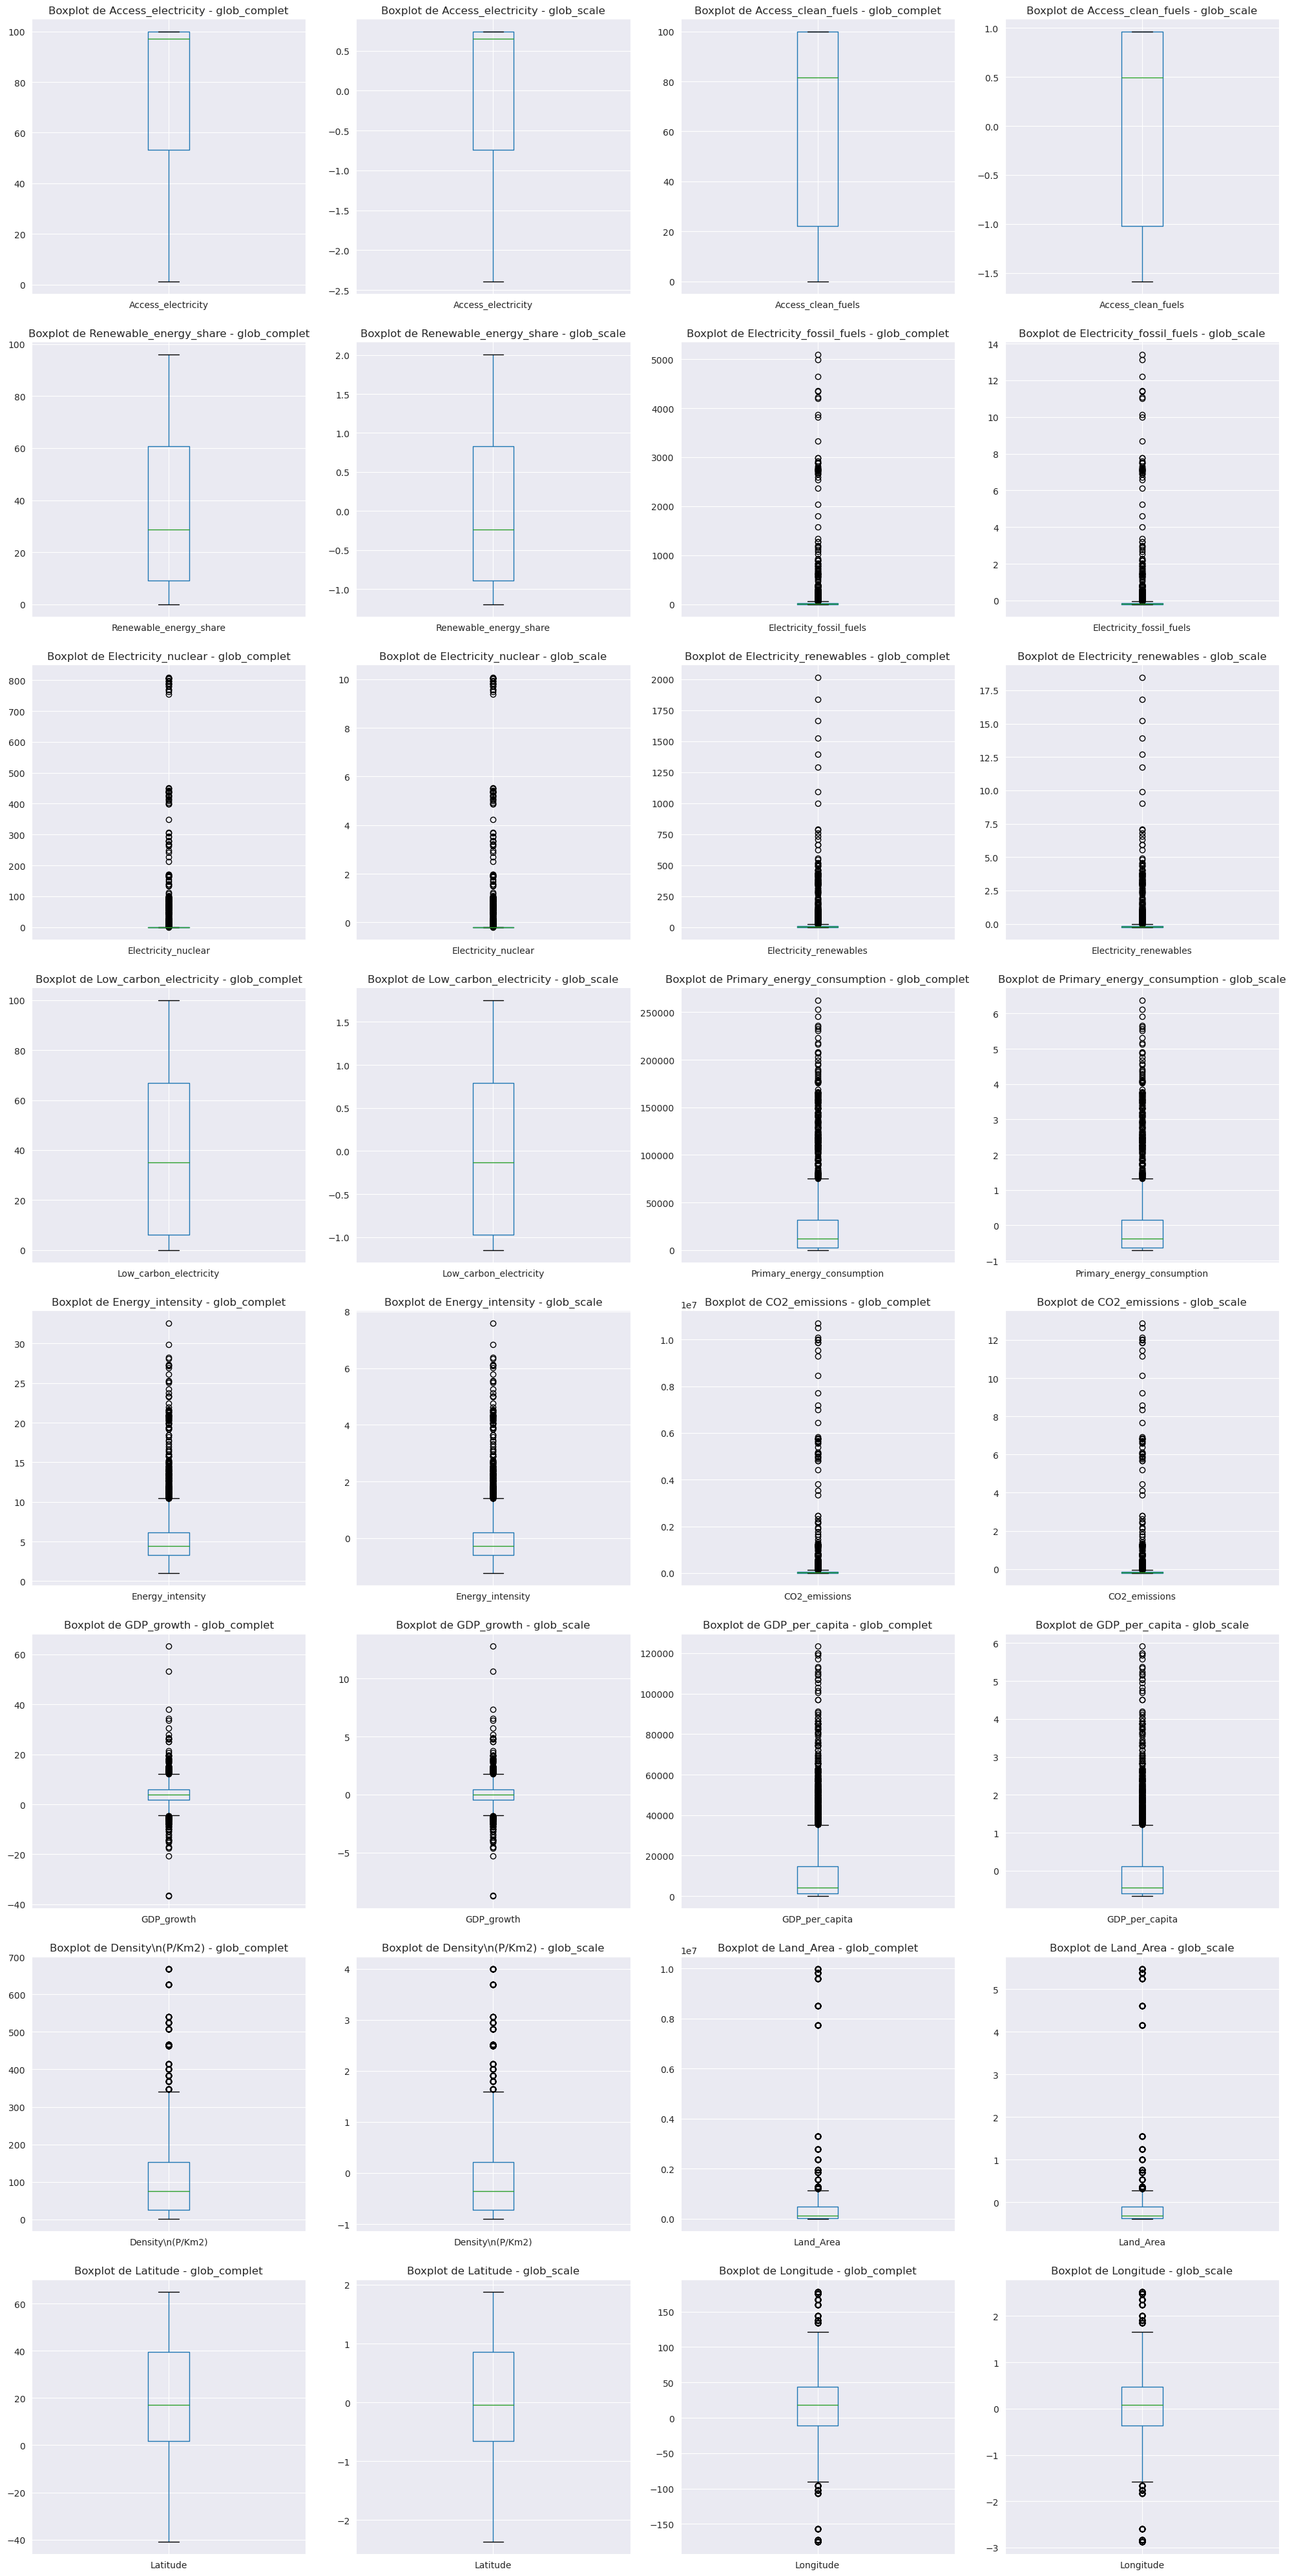

In [67]:
# Comparaison des histogrammes entre données centré et non centré
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, num_rows * 5))

# Récupérer les noms de colonnes numériques
numeric_cols_complet = glob_complet.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_scale = glob_scale.select_dtypes(include=['float64', 'int64']).columns

# Afficher les boxplots
for i in range(num_cols):
    row = i // 2
    col = (i % 2) * 2
    col_complet = numeric_cols_complet[i]
    col_scale = numeric_cols_scale[i]

    # Boxplot de glob_complet
    glob_complet.boxplot(column=col_complet, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {col_complet} - glob_complet')

    # Boxplot de glob_scale
    glob_scale.boxplot(column=col_scale, ax=axes[row, col + 1])
    axes[row, col + 1].set_title(f'Boxplot de {col_scale} - glob_scale')

# Supprimer les subplots vides s'il y a moins de colonnes dans la dernière ligne
if num_cols % 2 != 0:
    for col in range(num_cols % 2 * 2, 4):
        fig.delaxes(axes[num_rows - 1, col])

plt.tight_layout()
plt.show()

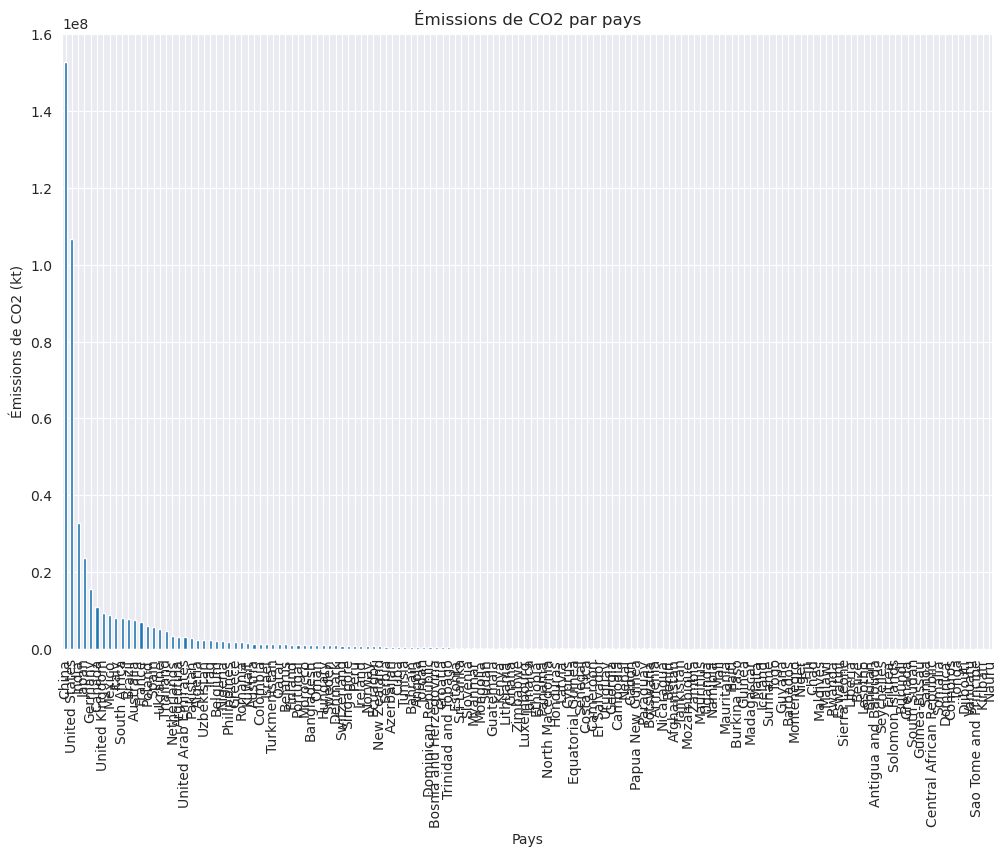

In [68]:
# Groupement des données par pays pour calculer les émissions totales de CO2
emissions_by_country = glob_complet.groupby('Entity')['CO2_emissions'].sum()

# Tri des émissions de CO2 par ordre décroissant
emissions_by_country_sorted = emissions_by_country.sort_values(ascending=False)

# Affichage des émissions de CO2 par pays
plt.figure(figsize=(12, 8))
emissions_by_country_sorted.plot(kind='bar')
plt.title('Émissions de CO2 par pays')
plt.xlabel('Pays')
plt.ylabel('Émissions de CO2 (kt)')
plt.xticks(rotation=90)
plt.show()

In [69]:
# Tri des émissions de CO2 par ordre décroissant
emissions_by_country_sorted = emissions_by_country.sort_values(ascending=False)

# Sélectionner les cinq premiers pays les plus émetteurs de CO2
top_5_emitters = emissions_by_country_sorted.head(5)

print("Les 5 pays les plus émetteurs de CO2 sont :")
print(top_5_emitters)

Les 5 pays les plus émetteurs de CO2 sont :
Entity
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: CO2_emissions, dtype: float64


In [70]:
cols_scatter = [
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density\\n(P/Km2)', 'Land Area(Km2)']

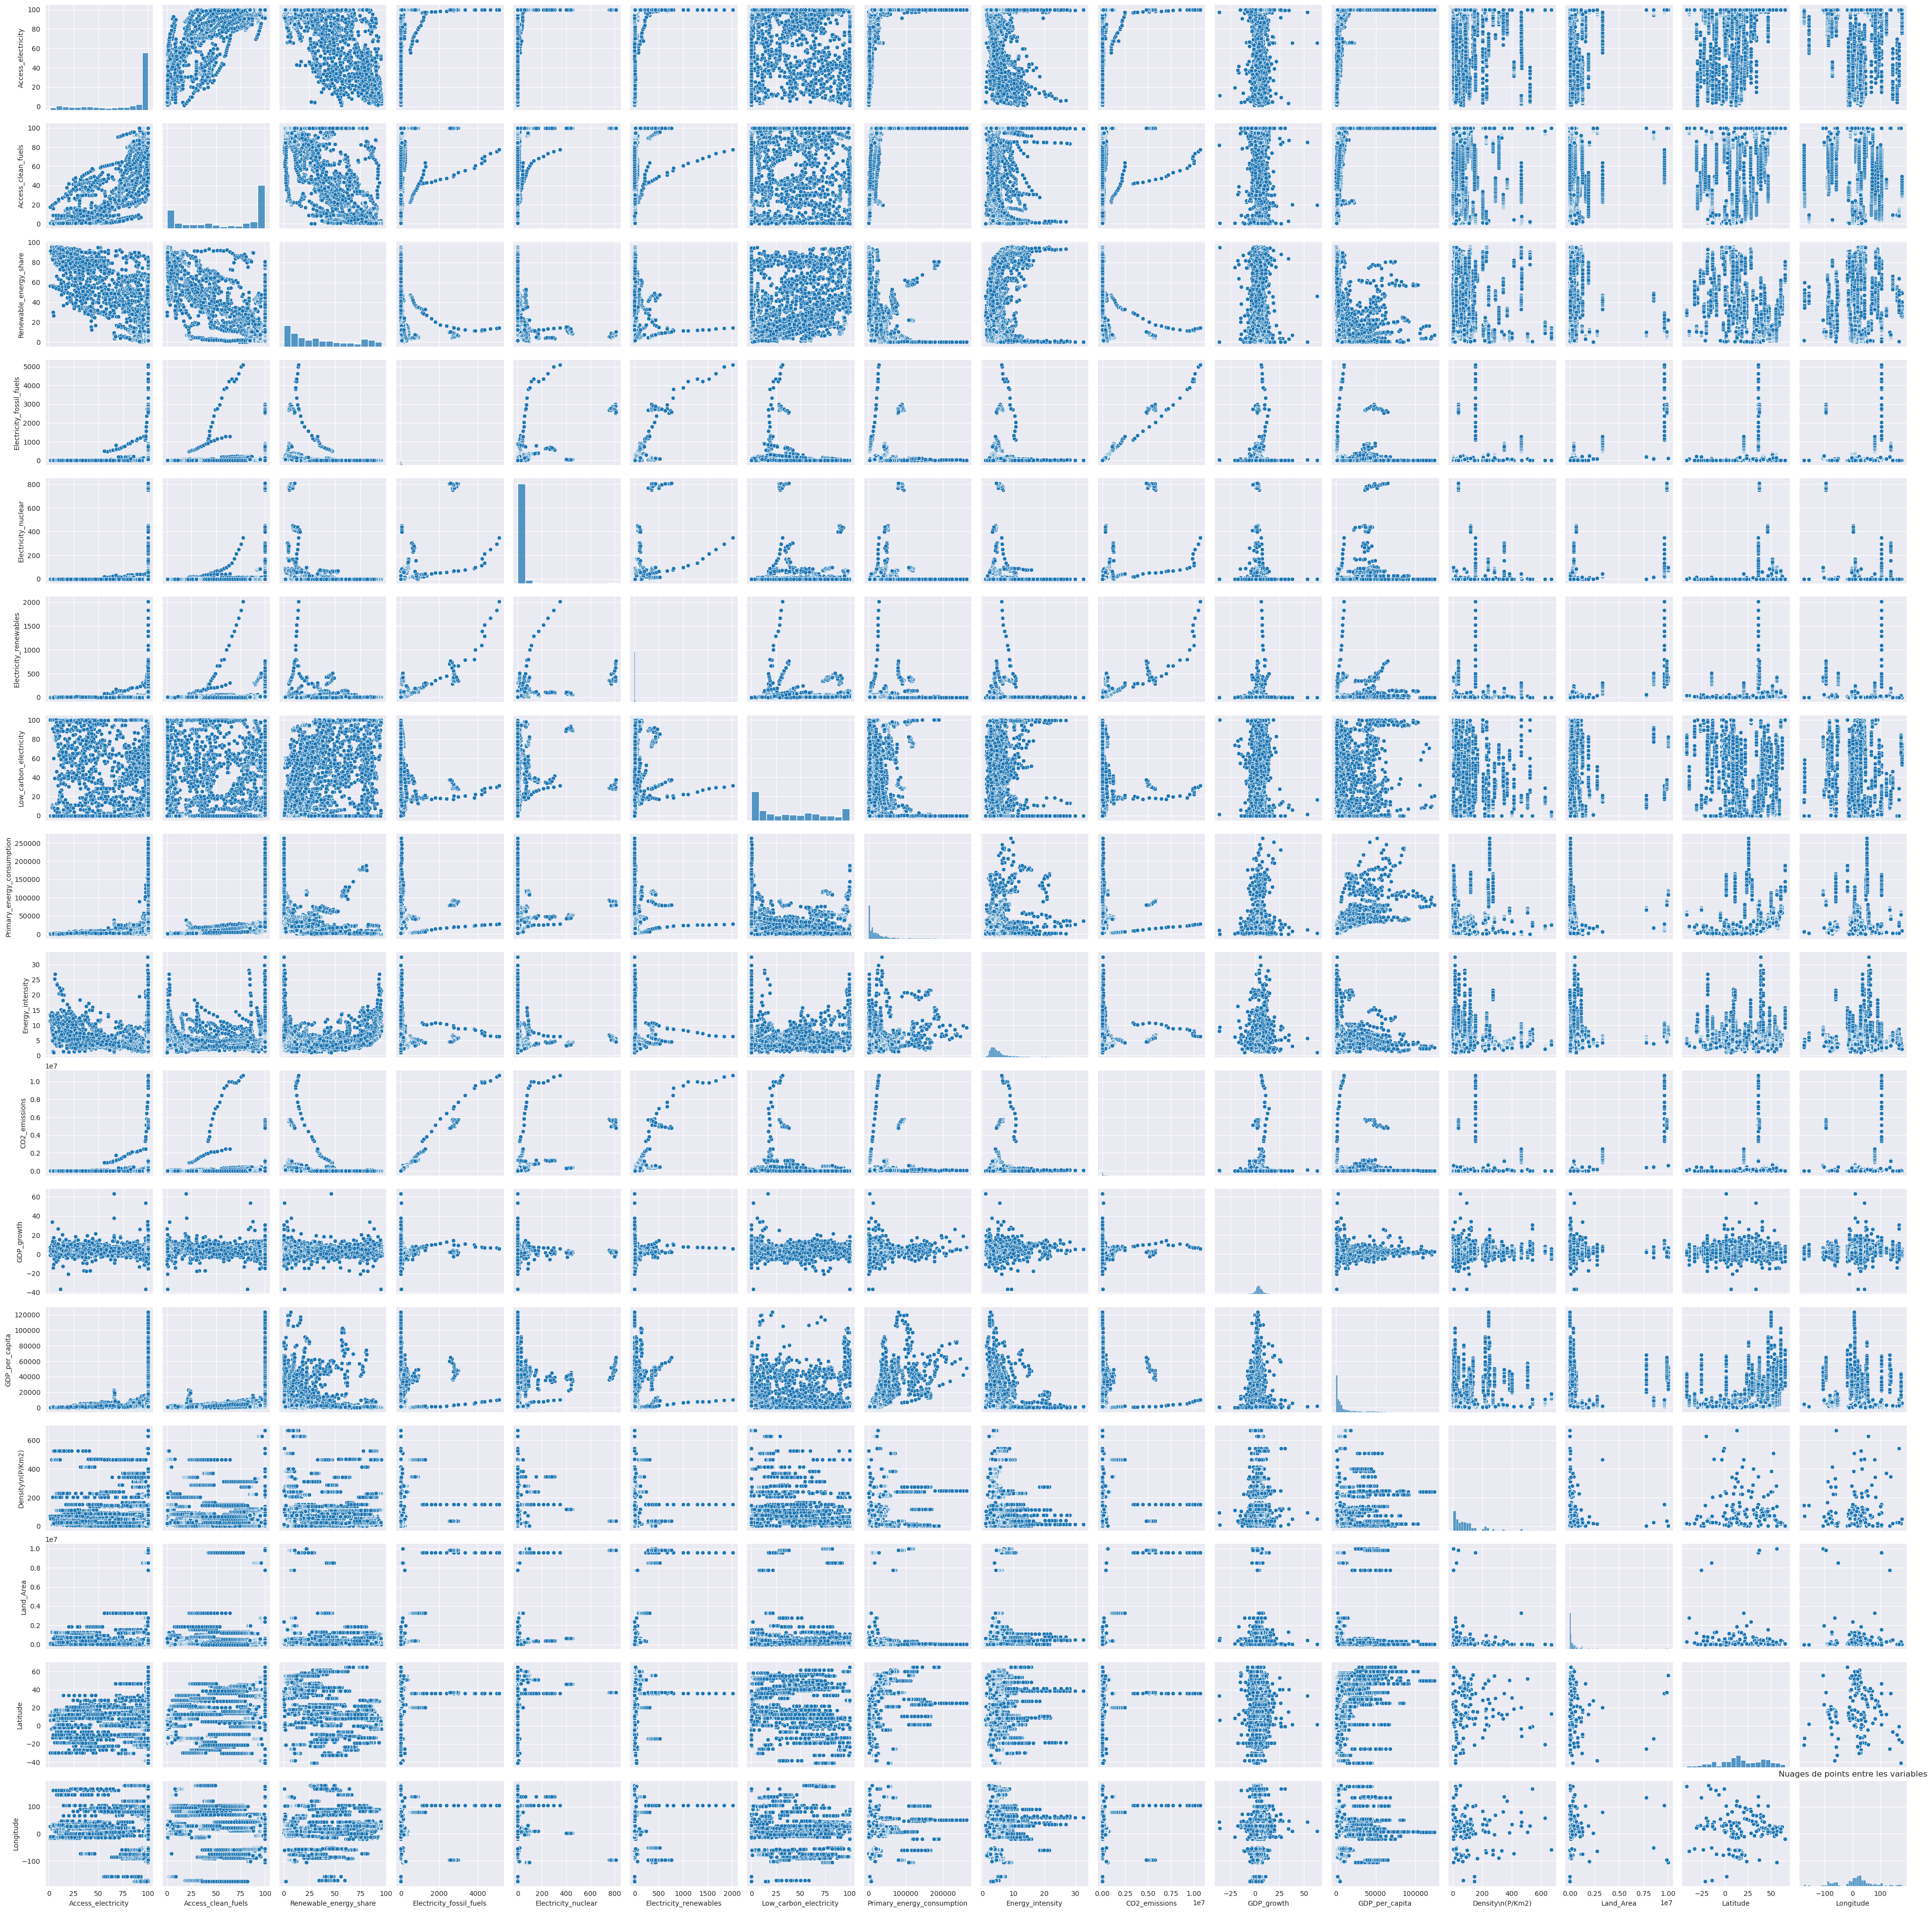

In [71]:
# Scatter plots
sns.pairplot(glob_complet)
plt.title('Nuages de points entre les variables')
plt.show()

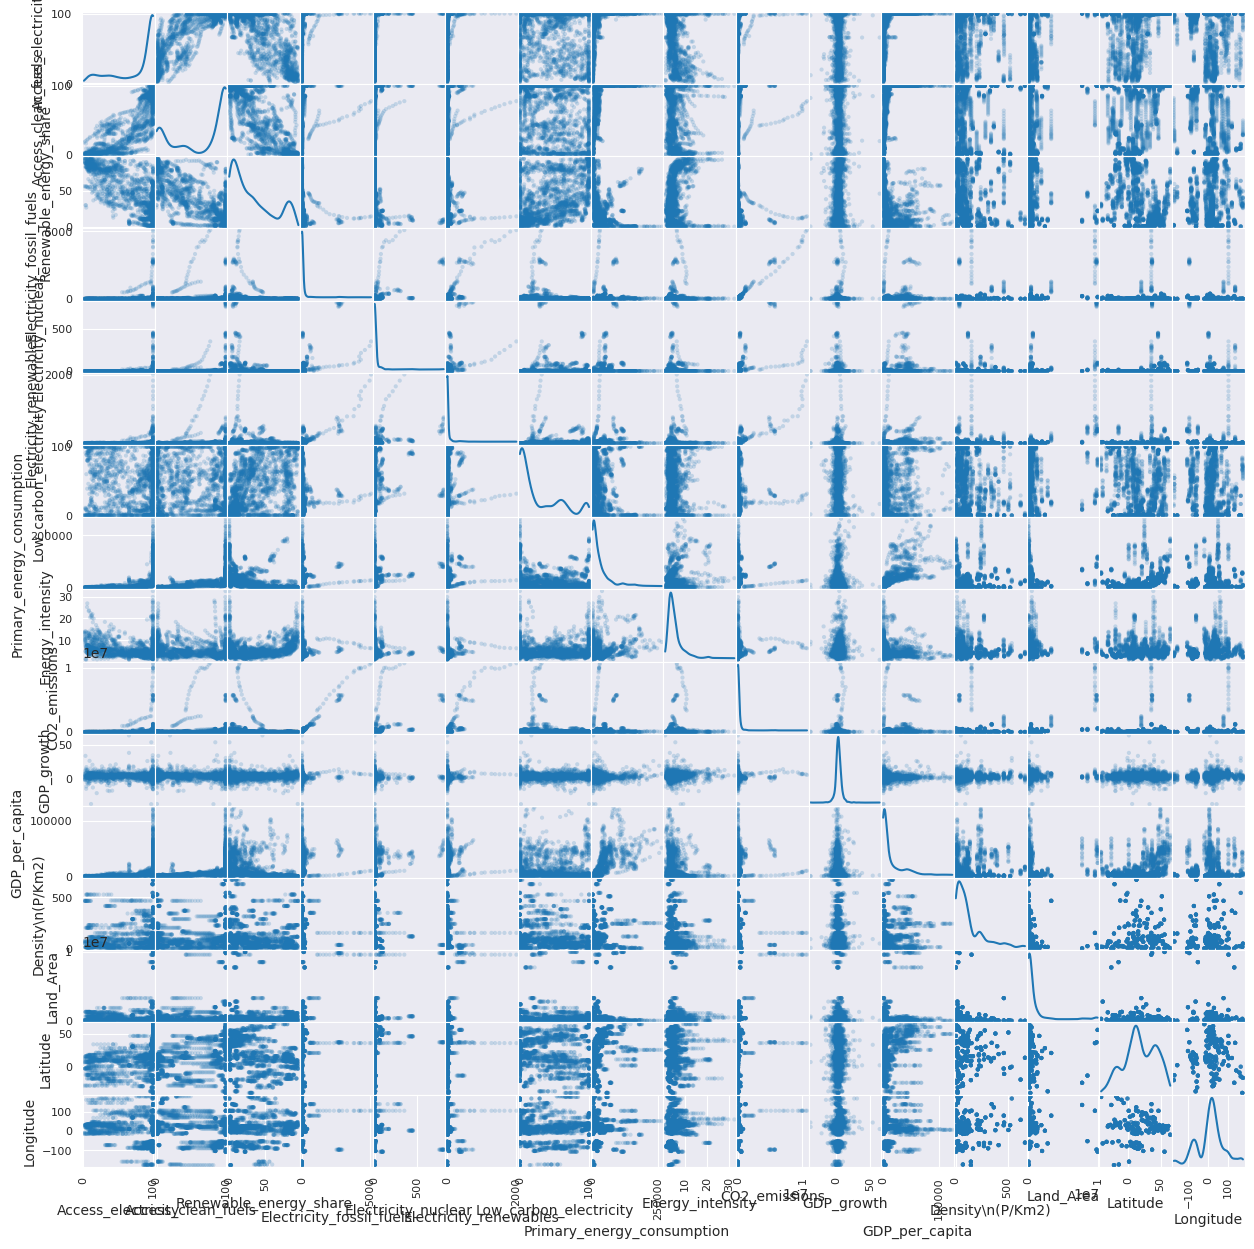

In [72]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(glob_complet, alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()

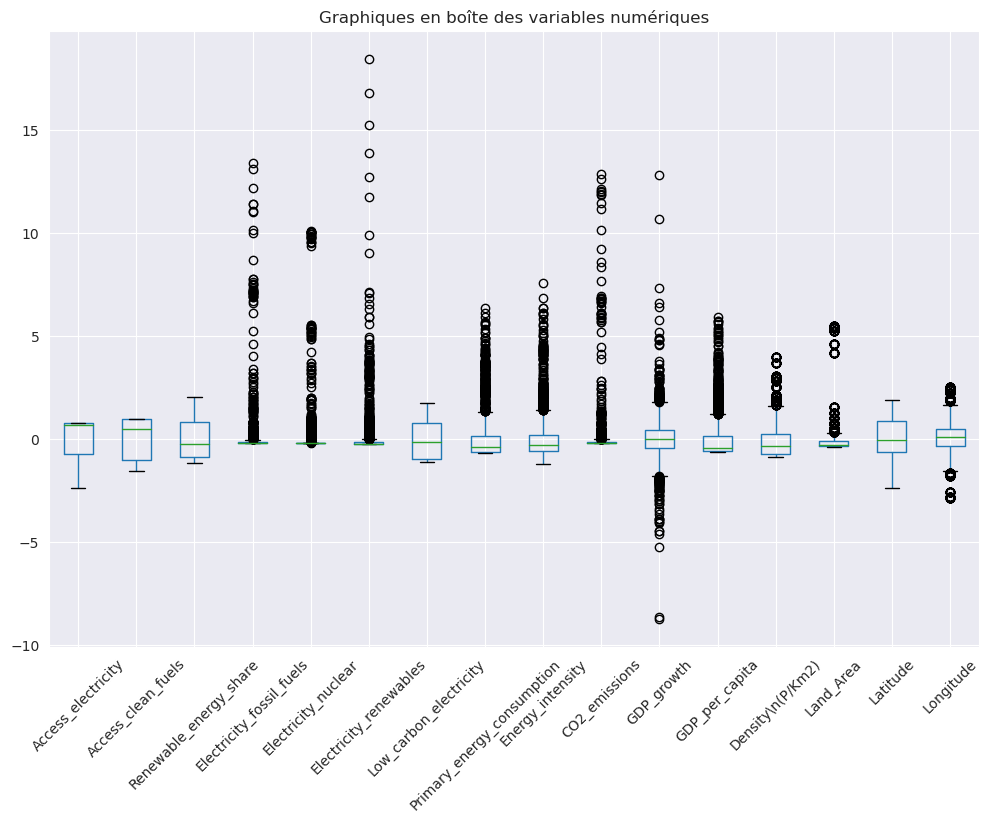

In [73]:
# Graphiques en boîte pour les variables numériques
plt.figure(figsize=(12, 8))
glob_scale.boxplot(rot=45)
plt.title('Graphiques en boîte des variables numériques')
plt.show()

In [74]:
glob_complet

Entity  Year  Access_electricity  Access_clean_fuels  \
3     Afghanistan  2003           14.738506                9.50   
4     Afghanistan  2004           20.064968               10.90   
5     Afghanistan  2005           25.390894               12.20   
6     Afghanistan  2006           30.718690               13.85   
7     Afghanistan  2007           36.051010               15.30   
...           ...   ...                 ...                 ...   
3643     Zimbabwe  2015           33.700000               29.50   
3644     Zimbabwe  2016           42.561730               29.80   
3645     Zimbabwe  2017           44.178635               29.80   
3646     Zimbabwe  2018           45.572647               29.90   
3647     Zimbabwe  2019           46.781475               30.10   

      Renewable_energy_share  Electricity_fossil_fuels  Electricity_nuclear  \
3                      36.66                      0.31                  0.0   
4                      44.24                      0.33                  0.0   
5                      33.88                      0.34                  0.0   
6                      31.89                      0.20                  0.0   
7                      28.78                      0.20                  0.0   
...                      ...                       ...                  ...   
3643                   80.82                      4.02                  0.0   
3644                   81.90                      3.50                  0.0   
3645                   82.46                      3.05                  0.0   
3646                   80.23                      3.73                  0.0   
3647                   81.50                      3.66                  0.0   

      Electricity_renewables  Low_carbon_electricity  \
3                       0.63               67.021280   
4                       0.56               62.921350   
5                       0.59               63.440857   
6                       0.64               76.190475   
7                       0.75               78.947370   
...                      ...                     ...   
3643                    5.37               57.188496   
3644                    3.32               48.680350   
3645                    4.30               58.503407   
3646                    5.46               59.412407   
3647                    4.58               55.582527   

      Primary_energy_consumption  Energy_intensity  CO2_emissions  GDP_growth  \
3                      229.96822              1.40    1220.000029    8.832278   
4                      204.23125              1.20    1029.999971    1.414118   
5                      252.06912              1.41    1549.999952   11.229715   
6                      304.42090              1.50    1759.999990    5.357403   
7                      354.27990              1.53    1769.999981   13.826320   
...                          ...               ...            ...         ...   
3643                  3860.92020             10.36   12430.000310    1.779873   
3644                  3227.68020             10.00   11020.000460    0.755869   
3645                  3068.01150              9.51   10340.000150    4.709492   
3646                  3441.98580              9.83   12380.000110    4.824211   
3647                  3003.65530             10.47   11760.000230   -6.144236   

      GDP_per_capita  Density\n(P/Km2)  Land_Area   Latitude  Longitude  
3         190.683814              60.0   652230.0  33.939110  67.709953  
4         211.382074              60.0   652230.0  33.939110  67.709953  
5         242.031313              60.0   652230.0  33.939110  67.709953  
6         263.733602              60.0   652230.0  33.939110  67.709953  
7         359.693158              60.0   652230.0  33.939110  67.709953  
...              ...               ...        ...        ...        ...  
3643     1445.069702              38.0   390757.0 -19.015438  29.154857  
3644     1464.58895

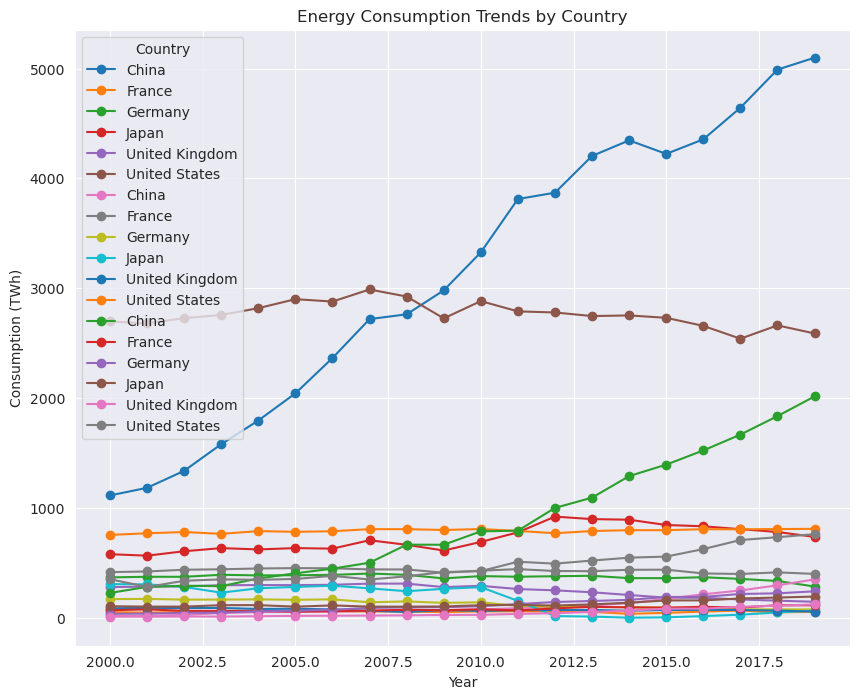

In [75]:
energy_data = glob_complet[['Entity', 'Year', 'Electricity_fossil_fuels', 'Electricity_nuclear', 'Electricity_renewables']]


energy_data = energy_data.melt(id_vars=['Entity', 'Year'], var_name='Energy_Type', value_name='Consumption')


filtered_energy_data = energy_data[energy_data['Entity'].isin(["China", "United Kingdom", "United States", "France", "Germany", "Japan"])]


plt.figure(figsize=(10, 8))

for energy_type, group in filtered_energy_data.groupby('Energy_Type'):
    for country, country_group in group.groupby('Entity'):
        plt.plot(country_group['Year'], country_group['Consumption'], label=country, linestyle='-', marker='o')

plt.title('Energy Consumption Trends by Country')
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


<Figure size 2000x1500 with 0 Axes>

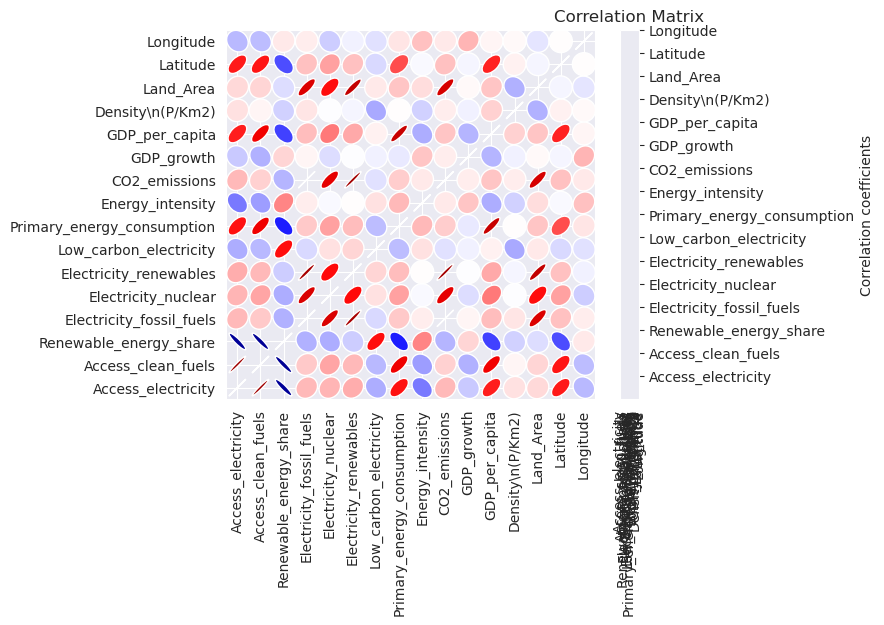

In [76]:
# en utilisant une matrice de corrélation
glob_complet_num=glob_complet[numeric_cols_complet]
correlation_matrix = glob_complet_num.corr()
plt.figure(figsize=(20, 15))  
m = plot_corr_ellipses(correlation_matrix, cmap='seismic',clim=[-1, 1])
cb = fig.colorbar(m)
cb.set_label('Correlation coefficients')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

On voit que "Electricity from fossil fuels (TWh)" est très corrélée avec la variable à prédire. 
Un modèle de régression linéaire simple avec cette seule variable donnerait  déjà de très bons résultats de prédiction.
(cf figure ci dessous)
Donc on va supprimer la variable Elecrticity from fossil fuels

In [77]:
"""# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(1, 1)

# Premier plot
axs.plot(glob_scale[["Electricity from fossil fuels (TWh)"]], glob_scale[["Value_co2_emissions_kt_by_country"]], "o")
axs.set_xlabel("Electricity from fossil fuels (TWh)")
axs.set_ylabel("Value_co2_emissions_kt_by_country")
r2_nuclear = r2_score(y_train, X_train["Electricity from fossil fuels (TWh)"])
mse_nuclear = mean_squared_error(y_train, X_train["Electricity from nuclear (TWh)"])
axs.set_title("R2 = " + str(r2_nuclear) + ", MSE = " + str(mse_nuclear))"""

'# Créer une figure et des sous-graphiques\nfig, axs = plt.subplots(1, 1)\n\n# Premier plot\naxs.plot(glob_scale[["Electricity from fossil fuels (TWh)"]], glob_scale[["Value_co2_emissions_kt_by_country"]], "o")\naxs.set_xlabel("Electricity from fossil fuels (TWh)")\naxs.set_ylabel("Value_co2_emissions_kt_by_country")\nr2_nuclear = r2_score(y_train, X_train["Electricity from fossil fuels (TWh)"])\nmse_nuclear = mean_squared_error(y_train, X_train["Electricity from nuclear (TWh)"])\naxs.set_title("R2 = " + str(r2_nuclear) + ", MSE = " + str(mse_nuclear))'

In [78]:
#glob_scale = glob_scale.drop('Electricity from fossil fuels (TWh)', axis = 1)
glob_complet = glob_complet.drop('Electricity_fossil_fuels', axis = 1)
glob_scale =glob_scale.drop('Electricity_fossil_fuels', axis = 1)




In [79]:
glob_complet.head()

Entity  Year  Access_electricity  Access_clean_fuels  \
3  Afghanistan  2003           14.738506                9.50   
4  Afghanistan  2004           20.064968               10.90   
5  Afghanistan  2005           25.390894               12.20   
6  Afghanistan  2006           30.718690               13.85   
7  Afghanistan  2007           36.051010               15.30   

   Renewable_energy_share  Electricity_nuclear  Electricity_renewables  \
3                   36.66                  0.0                    0.63   
4                   44.24                  0.0                    0.56   
5                   33.88                  0.0                    0.59   
6                   31.89                  0.0                    0.64   
7                   28.78                  0.0                    0.75   

   Low_carbon_electricity  Primary_energy_consumption  Energy_intensity  \
3               67.021280                   229.96822              1.40   
4               62.921350                   204.23125              1.20   
5               63.440857                   252.06912              1.41   
6               76.190475                   304.42090              1.50   
7               78.947370                   354.27990              1.53   

   CO2_emissions  GDP_growth  GDP_per_capita  Density\n(P/Km2)  Land_Area  \
3    1220.000029    8.832278      190.683814              60.0   652230.0   
4    1029.999971    1.414118      211.382074              60.0   652230.0   
5    1549.999952   11.229715      242.031313              60.0   652230.0   
6    1759.999990    5.357403      263.733602              60.0   652230.0   
7    1769.999981   13.826320      359.693158              60.0   652230.0   

   Latitude  Longitude  
3  33.93911  67.709953  
4  33.93911  67.709953  
5  33.93911  67.709953  
6  33.93911  67.709953  
7  33.93911  67.709953

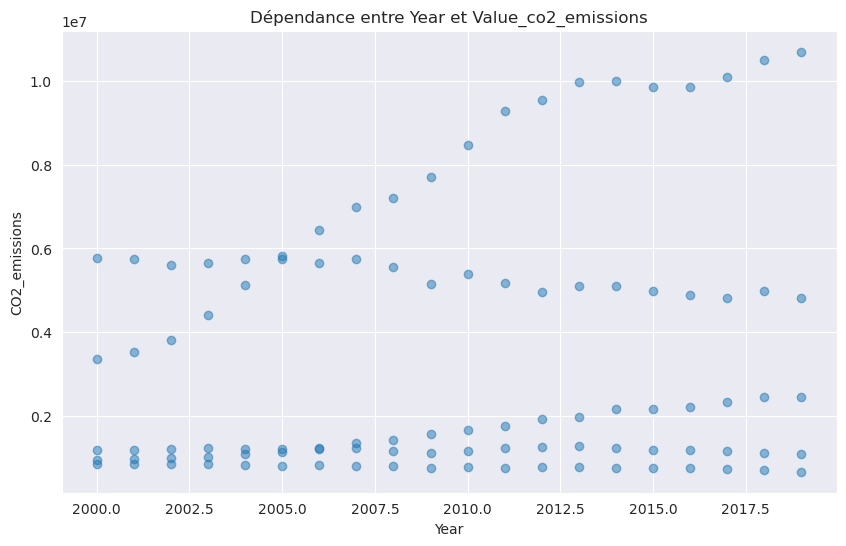

In [80]:
liste = ["China","United States","India","Japan","Germany"]
dfr = glob_complet[glob_complet['Entity'].isin(liste)]
plt.figure(figsize=(10, 6))

plt.scatter(dfr['Year'], dfr['CO2_emissions'], alpha=0.5)
plt.title('Dépendance entre Year et Value_co2_emissions')
plt.xlabel('Year')
plt.ylabel('CO2_emissions')
plt.grid(True)
plt.show()

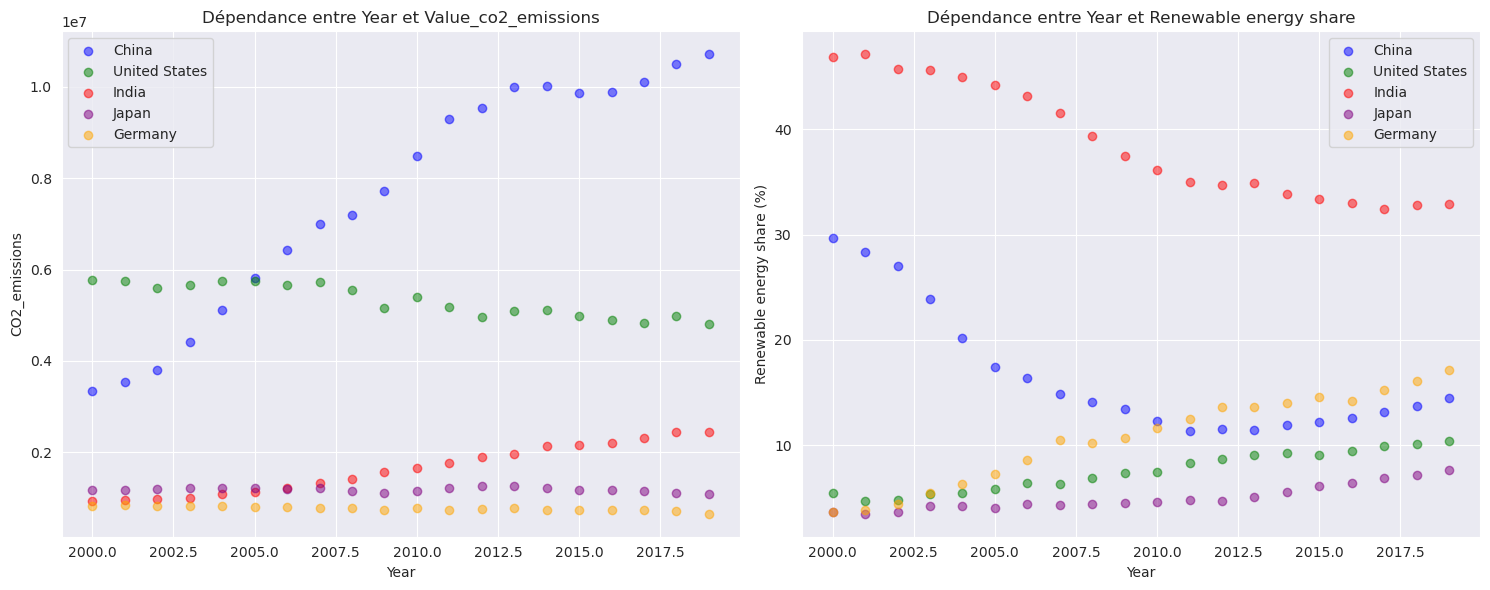

In [81]:
liste = ["China", "United States", "India", "Japan", "Germany"]

# Filtrer le DataFrame pour inclure seulement les pays d'intérêt
dfr = glob_complet[glob_complet['Entity'].isin(liste)]

# Créer la figure et les sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 ligne, 2 colonnes

# Couleurs pour chaque pays
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Premier scatter plot: Year vs Value_co2_emissions_kt_by_country
for i, country in enumerate(liste):
    country_data = dfr[dfr['Entity'] == country]
    axs[0].scatter(country_data['Year'], country_data['CO2_emissions'], 
                   alpha=0.5, color=colors[i], label=country)
    
axs[0].set_title('Dépendance entre Year et Value_co2_emissions')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('CO2_emissions')
axs[0].grid(True)
axs[0].legend()

# Deuxième scatter plot: Year vs Renewable energy share in the total final energy consumption
for i, country in enumerate(liste):
    country_data = dfr[dfr['Entity'] == country]
    axs[1].scatter(country_data['Year'], country_data['Renewable_energy_share'], 
                   alpha=0.5, color=colors[i], label=country)
    
axs[1].set_title('Dépendance entre Year et Renewable energy share')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Renewable energy share (%)')
axs[1].grid(True)
axs[1].legend()

# Ajuster l'espace entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

# Analyse en ACP.

[0.27649578 0.17923456 0.09057644 0.08665183 0.06883287 0.06052232
 0.05671245 0.04793457 0.04271126 0.03516231]
-----------------Critère du coude------------------


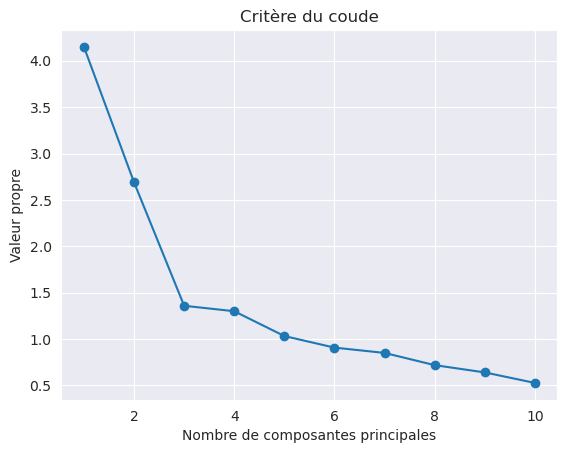

--------------------------------
--- PCA ---
Initial dimension: (2868, 15)
Dimension after projection: (2868, 10)

--- Explained variance ---
Component  1 : 4.15 i.e. 27.65 % of the total variance
Component  2 : 2.69 i.e. 17.92 % of the total variance
Component  3 : 1.36 i.e. 9.06 % of the total variance
Component  4 : 1.3 i.e. 8.67 % of the total variance
Component  5 : 1.03 i.e. 6.88 % of the total variance
Component  6 : 0.91 i.e. 6.05 % of the total variance
Component  7 : 0.85 i.e. 5.67 % of the total variance
Component  8 : 0.72 i.e. 4.79 % of the total variance
Component  9 : 0.64 i.e. 4.27 % of the total variance
Component  10 : 0.53 i.e. 3.52 % of the total variance


In [82]:
k=10
pca = PCA(n_components=k)
glob_scale_pca = pca.fit_transform(glob_scale)
print(pca.explained_variance_ratio_)
print('-----------------Critère du coude------------------')
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Valeur propre')
plt.title('Critère du coude')
plt.show()
print('--------------------------------')
print('--- PCA ---')
print('Initial dimension:', glob_scale.shape)
print('Dimension after projection:', glob_scale_pca.shape)

print('')

print('--- Explained variance ---')
for i in range(k):    
    print('Component ',i+1,':', round(pca.explained_variance_[i],2), 'i.e.', round(100*pca.explained_variance_ratio_[i],2), '% of the total variance')


Ici on peut voir, à l'aide de la variance expliquée (ou bien des valeurs propre), à quel point chaque composante principale permet d'expliquer les données 
De plus il faudrait récuperer Les 7 premières composantes principales pour expliquer 80 à 90 % des données
Ainsi on peut en conclure que bien que l'ACP nous permettra de réduire la dimension, elle nous fera également perdre beaucoup de données.

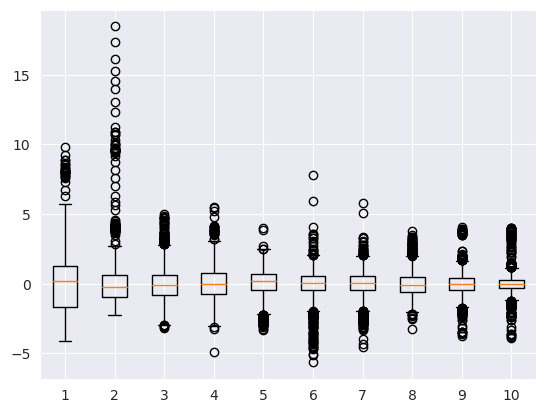

In [83]:
## distribution des composantes principales
plt.boxplot(glob_scale_pca[:,0:10])
plt.show()

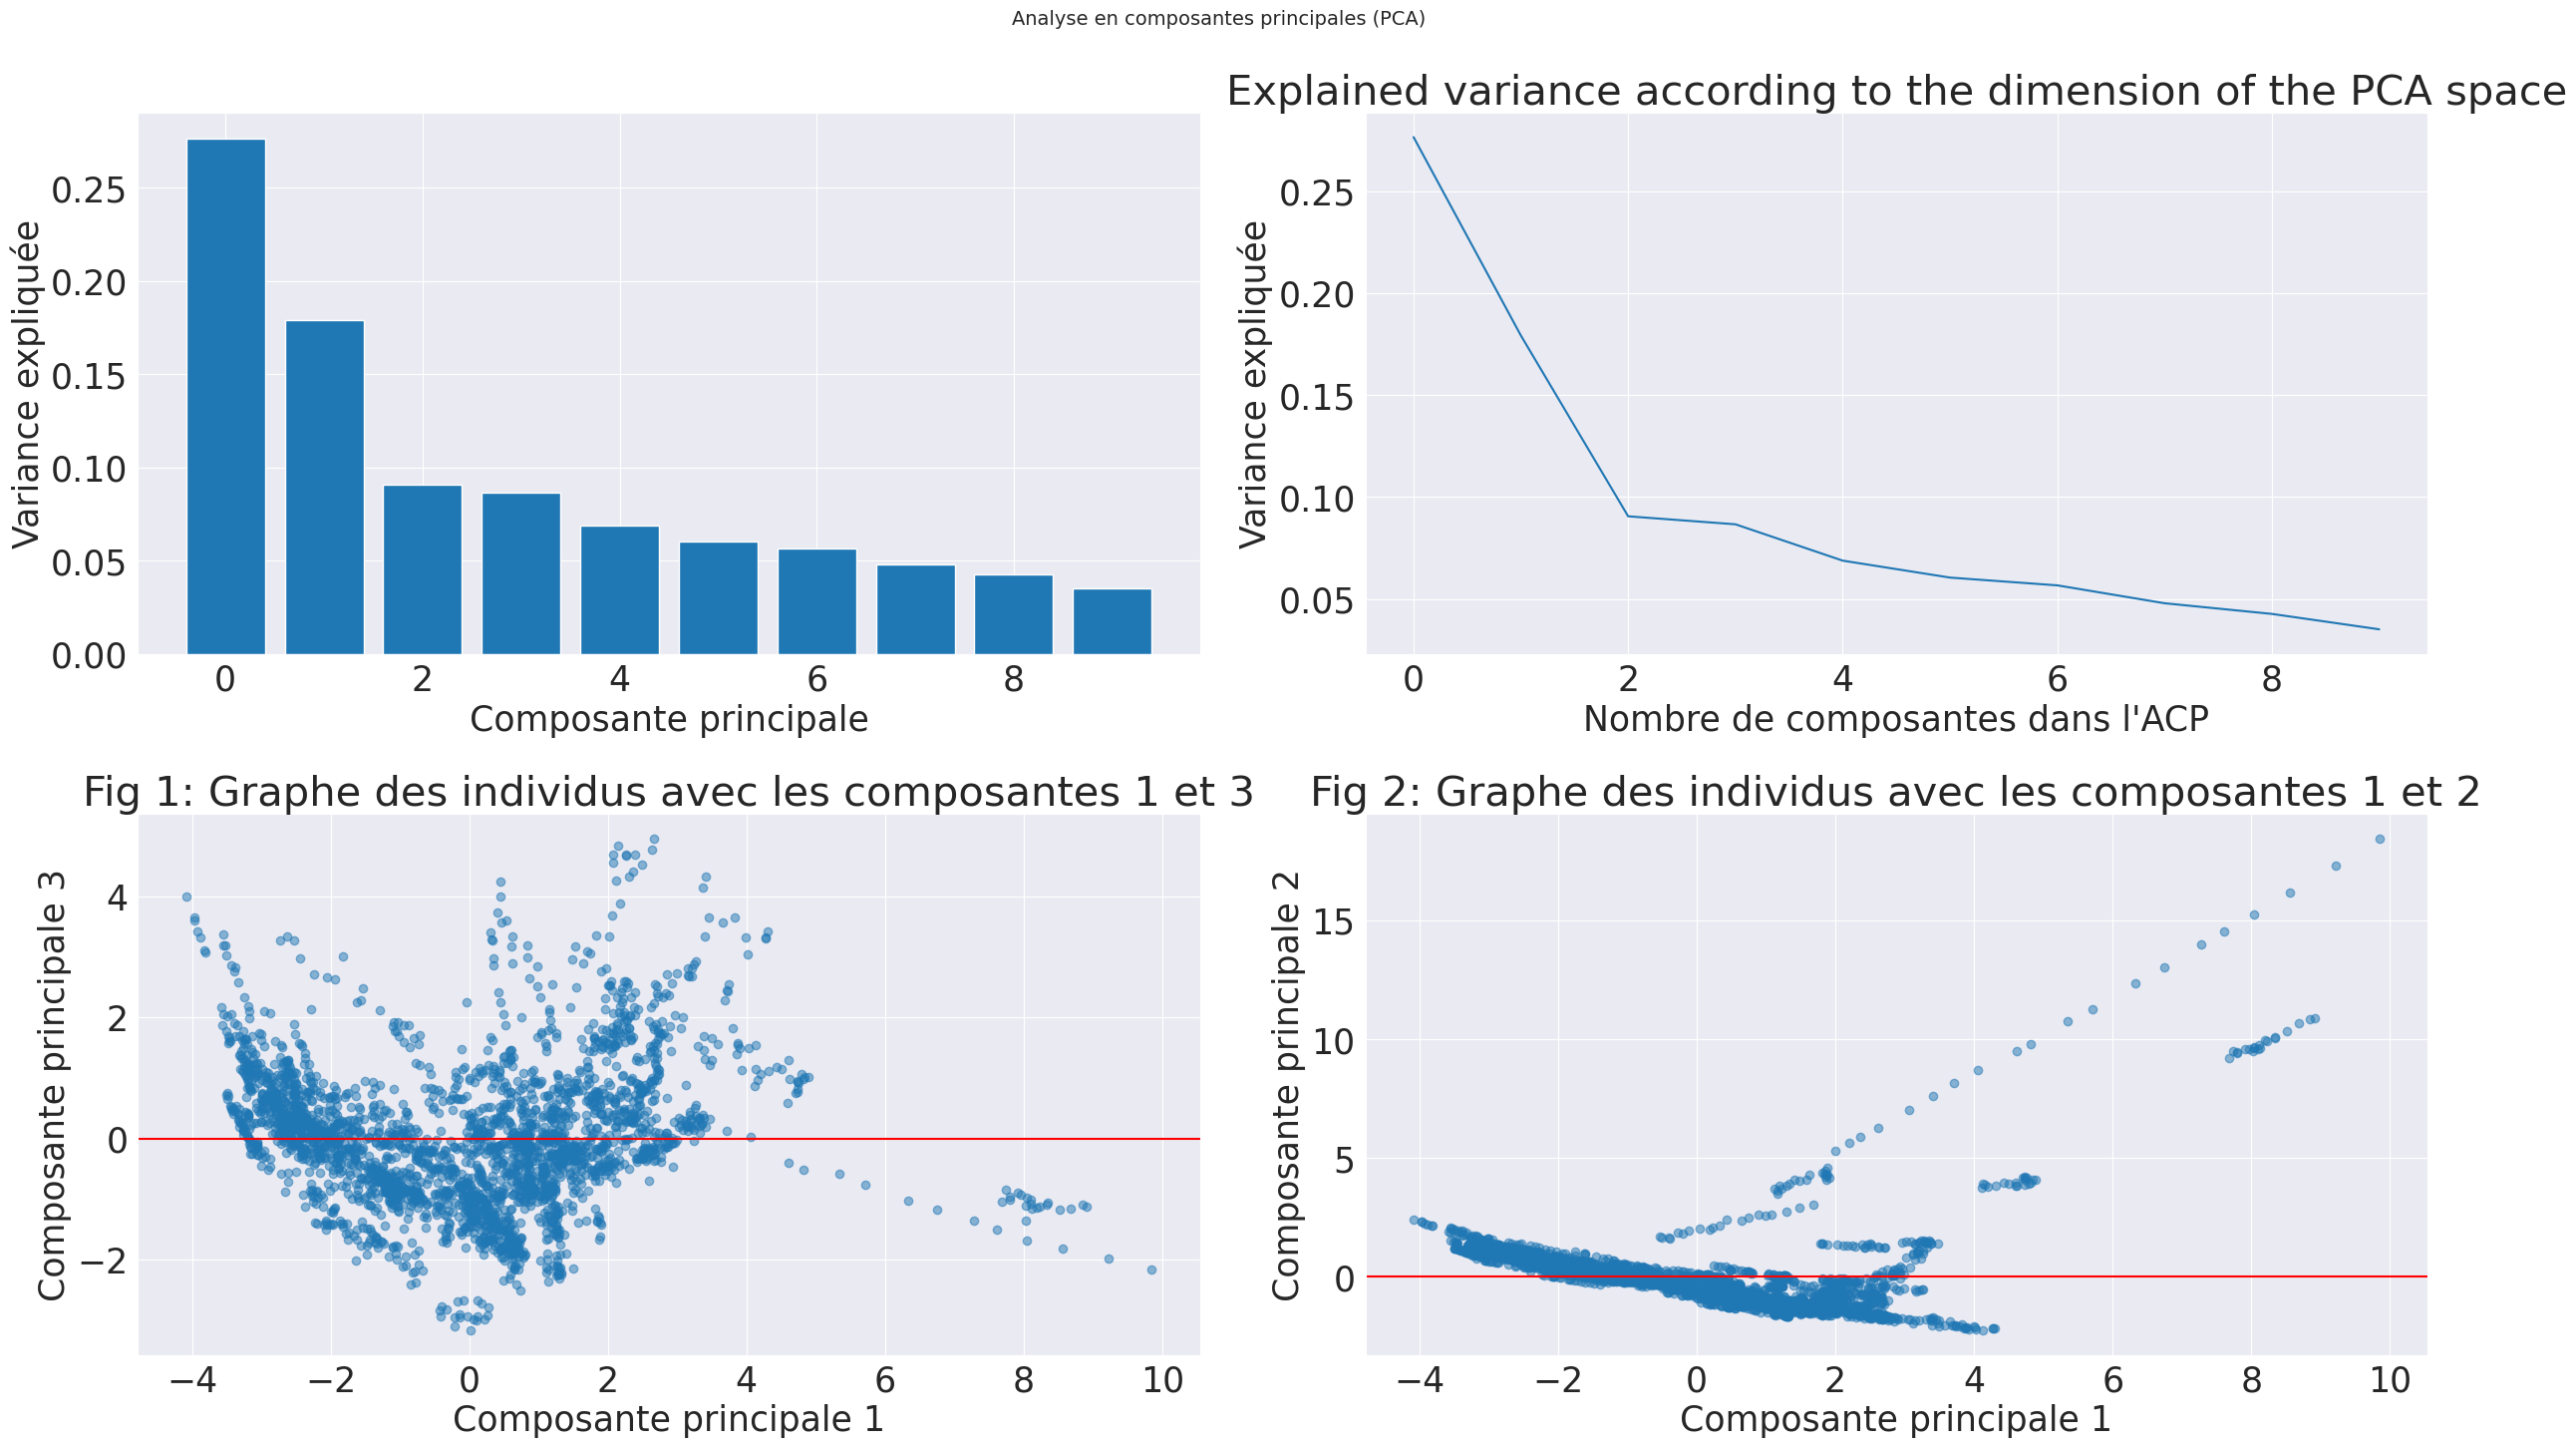

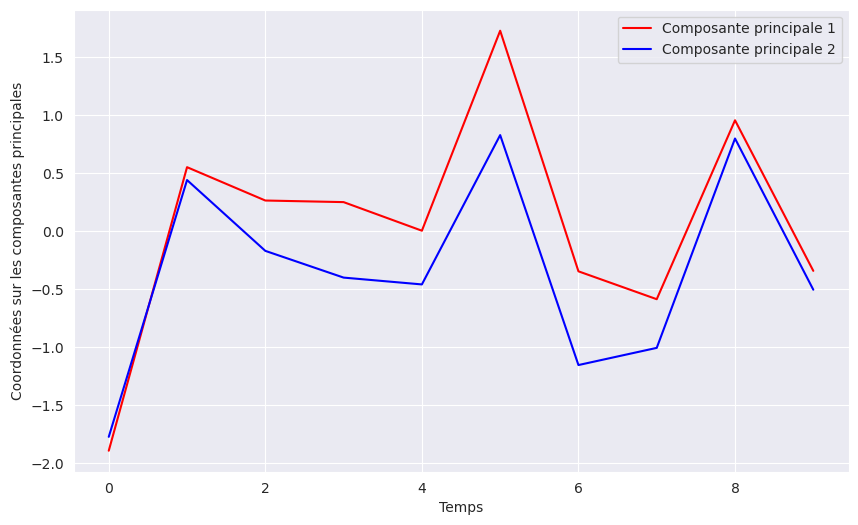

In [84]:

plt.rcParams.update({'font.size': 25})

# Création de la figure et des axes
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Visualisation des valeurs propres
ax1.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
ax1.set_xlabel('Composante principale')
ax1.set_ylabel('Variance expliquée')

# Deuxième subplot
ax2.plot(pca.explained_variance_ratio_)
ax2.set_title('Explained variance according to the dimension of the PCA space')
ax2.set_xlabel('Nombre de composantes dans l\'ACP')
ax2.set_ylabel('Variance expliquée')

# Troisième subplot
ax3.scatter(glob_scale_pca[:,0], glob_scale_pca[:,2], alpha=0.5)
ax3.axhline(y=0, color='r')
ax3.set_title('Fig 1: Graphe des individus avec les composantes 1 et 3')
ax3.set_xlabel('Composante principale 1')
ax3.set_ylabel('Composante principale 3')

# Quatrième subplot
ax4.scatter(glob_scale_pca[:,0], glob_scale_pca[:,1], alpha=0.5)
ax4.axhline(y=0, color='r')
ax4.set_title('Fig 2: Graphe des individus avec les composantes 1 et 2')
ax4.set_xlabel('Composante principale 1')
ax4.set_ylabel('Composante principale 2')


plt.suptitle('Analyse en composantes principales (PCA)', fontsize=14)
plt.tight_layout()

plt.show()


# Visualisation des variables sur les deux premières composantes principales
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10, 6))
plt.plot(glob_scale_pca[0], label='Composante principale 1', color='red')
plt.plot(glob_scale_pca[1], label='Composante principale 2', color='blue')
plt.xlabel('Temps')
plt.ylabel('Coordonnées sur les composantes principales')
plt.legend()
plt.show()



On affiche avec la figure 1 les individus en fonction des composantes principales 1 et 3 et avec la figure 2 en fonction des composantes 1 et 2

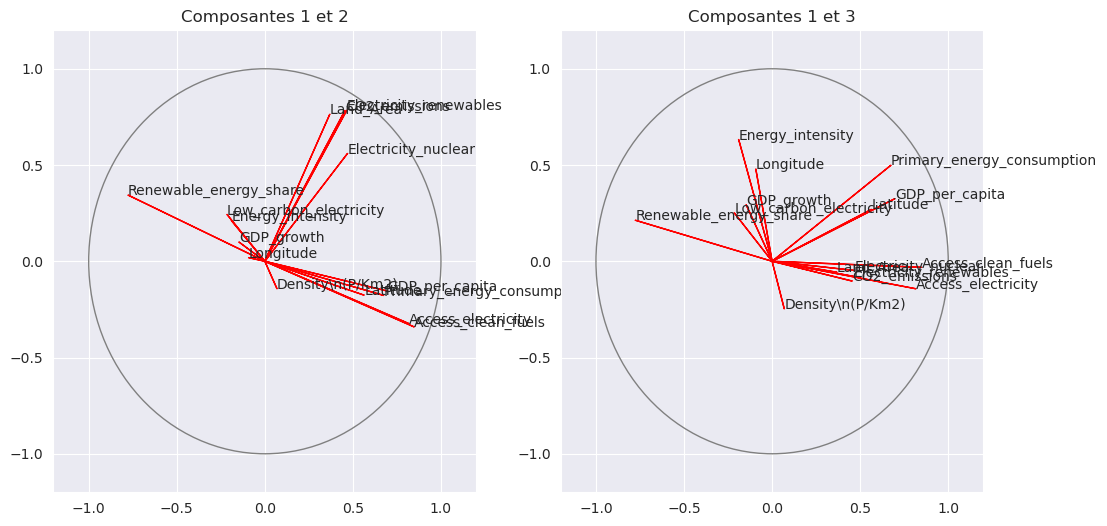

In [85]:
# Calcul des coordonnées des composantes principales
coord1_1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2_1 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

coord1_2 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2_2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Premier subplot
ax1 = axes[0]
for i, j, nom in zip(coord1_1, coord2_1, glob_scale.columns):
    ax1.text(i, j, nom)
    ax1.arrow(0, 0, i, j, color = 'r', width = 0.0001)
ax1.add_patch(plt.Circle((0, 0), radius=1, color='gray', fill=False))
ax1.axis((-1.2, 1.2, -1.2, 1.2))
ax1.set_title('Composantes 1 et 2')

# Deuxième subplot
ax2 = axes[1]
for i, j, nom in zip(coord1_2, coord2_2, glob_scale.columns):
    ax2.text(i, j, nom)
    ax2.arrow(0, 0, i, j, color = 'r', width = 0.0001)
ax2.add_patch(plt.Circle((0, 0), radius=1, color='gray', fill=False))
ax2.axis((-1.2, 1.2, -1.2, 1.2))
ax2.set_title('Composantes 1 et 3')

plt.show()


In [86]:
"""
### ACP sur données non centrés
k=10
pca = PCA(n_components=k)

glob_complet_num = glob_complet[numeric_cols]
glob_pca = pca.fit_transform(glob_complet_num)


plt.rcParams.update({'font.size': 25})

# Création de la figure et des axes
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Visualisation des valeurs propres
ax1.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
ax1.set_xlabel('Composante principale')
ax1.set_ylabel('Variance expliquée')

# Deuxième subplot
ax2.plot(pca.explained_variance_ratio_)
ax2.set_title('Explained variance according to the dimension of the PCA space')
ax2.set_xlabel('Nombre de composantes dans l\'ACP')
ax2.set_ylabel('Variance expliquée')

# Troisième subplot
ax3.scatter(glob_pca[:,0], glob_pca[:,2], alpha=0.5)
ax3.axhline(y=0, color='r')
ax3.set_title('Graphe des individus avec les composantes 1 et 3')
ax3.set_xlabel('Composante principale 1')
ax3.set_ylabel('Composante principale 3')

# Quatrième subplot
ax4.scatter(glob_pca[:,0], glob_pca[:,1], alpha=0.5)
ax4.axhline(y=0, color='r')
ax4.set_title('Graphe des individus avec les composantes 1 et 2')
ax4.set_xlabel('Composante principale 1')
ax4.set_ylabel('Composante principale 2')


plt.suptitle('Analyse en composantes principales (PCA)', fontsize=14)
plt.tight_layout()

plt.show()


# Visualisation des variables sur les deux premières composantes principales
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10, 6))
plt.plot(glob_pca[0], label='Composante principale 1', color='red')
plt.plot(glob_pca[1], label='Composante principale 2', color='blue')
plt.xlabel('Temps')
plt.ylabel('Coordonnées sur les composantes principales')
plt.legend()
plt.show()
"""

"\n### ACP sur données non centrés\nk=10\npca = PCA(n_components=k)\n\nglob_complet_num = glob_complet[numeric_cols]\nglob_pca = pca.fit_transform(glob_complet_num)\n\n\nplt.rcParams.update({'font.size': 25})\n\n# Création de la figure et des axes\nfig = plt.figure(figsize=(25, 15))\nax1 = fig.add_subplot(2, 2, 1)\nax2 = fig.add_subplot(2, 2, 2)\nax3 = fig.add_subplot(2, 2, 3)\nax4 = fig.add_subplot(2, 2, 4)\n\n# Visualisation des valeurs propres\nax1.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)\nax1.set_xlabel('Composante principale')\nax1.set_ylabel('Variance expliquée')\n\n# Deuxième subplot\nax2.plot(pca.explained_variance_ratio_)\nax2.set_title('Explained variance according to the dimension of the PCA space')\nax2.set_xlabel('Nombre de composantes dans l'ACP')\nax2.set_ylabel('Variance expliquée')\n\n# Troisième subplot\nax3.scatter(glob_pca[:,0], glob_pca[:,2], alpha=0.5)\nax3.axhline(y=0, color='r')\nax3.set_title('Graphe des individus avec les c

In [87]:
"""
# Calcul des coordonnées des composantes principales
coord1_1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2_1 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

coord1_2 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2_2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Premier subplot
ax1 = axes[0]
for i, j, nom in zip(coord1_1, coord2_1, glob_complet_num.columns):
    ax1.text(i, j, nom)
    ax1.arrow(0, 0, i, j, color = 'r', width = 0.0001)
ax1.add_patch(plt.Circle((0, 0), radius=1, color='gray', fill=False))
ax1.axis((-1.2, 1.2, -1.2, 1.2))
ax1.set_title('Composantes 1 et 2')

# Deuxième subplot
ax2 = axes[1]
for i, j, nom in zip(coord1_2, coord2_2, glob_complet_num.columns):
    ax2.text(i, j, nom)
    ax2.arrow(0, 0, i, j, color = 'r', width = 0.0001)
ax2.add_patch(plt.Circle((0, 0), radius=1, color='gray', fill=False))
ax2.axis((-1.2, 1.2, -1.2, 1.2))
ax2.set_title('Composantes 1 et 3')

plt.show()
"""

"\n# Calcul des coordonnées des composantes principales\ncoord1_1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])\ncoord2_1 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])\n\ncoord1_2 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])\ncoord2_2 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])\n\n# Création de la figure et des sous-graphiques\nfig, axes = plt.subplots(1, 2, figsize=(12, 6))\n\n# Premier subplot\nax1 = axes[0]\nfor i, j, nom in zip(coord1_1, coord2_1, glob_complet_num.columns):\n    ax1.text(i, j, nom)\n    ax1.arrow(0, 0, i, j, color = 'r', width = 0.0001)\nax1.add_patch(plt.Circle((0, 0), radius=1, color='gray', fill=False))\nax1.axis((-1.2, 1.2, -1.2, 1.2))\nax1.set_title('Composantes 1 et 2')\n\n# Deuxième subplot\nax2 = axes[1]\nfor i, j, nom in zip(coord1_2, coord2_2, glob_complet_num.columns):\n    ax2.text(i, j, nom)\n    ax2.arrow(0, 0, i, j, color = 'r', width = 0.0001)\nax2.add_patch(plt.Circle((0, 0), radius=1, color='g

# Modélisation

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def rmse(x,y):
    return np.sqrt(mean_squared_error(x,y))

In [89]:
glob_scale

Access_electricity  Access_clean_fuels  Renewable_energy_share  \
3              -1.963065           -1.342539                0.028580   
4              -1.793997           -1.306853                0.281088   
5              -1.624946           -1.273717               -0.064029   
6              -1.455836           -1.231659               -0.130321   
7              -1.286582           -1.194699               -0.233923   
...                  ...                 ...                     ...   
3643           -1.361206           -0.832747                1.499660   
3644           -1.079925           -0.825100                1.535637   
3645           -1.028602           -0.825100                1.554292   
3646           -0.984355           -0.822551                1.480005   
3647           -0.945985           -0.817453                1.522312   

      Electricity_nuclear  Electricity_renewables  Low_carbon_electricity  \
3               -0.194725               -0.241340                0.795146   
4               -0.194725               -0.241990                0.676131   
5               -0.194725               -0.241712                0.691211   
6               -0.194725               -0.241247                1.061314   
7               -0.194725               -0.240225                1.141343   
...                   ...                     ...                     ...   
3643            -0.194725               -0.197297                0.509715   
3644            -0.194725               -0.216345                0.262736   
3645            -0.194725               -0.207239                0.547884   
3646            -0.194725               -0.196461                0.574271   
3647            -0.194725               -0.204637                0.463096   

      Primary_energy_consumption  Energy_intensity  CO2_emissions  GDP_growth  \
3                      -0.697002         -1.123384      -0.204918    1.062898   
4                      -0.697696         -1.179300      -0.205151   -0.534190   
5                      -0.696406         -1.120588      -0.204515    1.579053   
6                      -0.694995         -1.095426      -0.204258    0.314777   
7                      -0.693650         -1.087039      -0.204246    2.138087   
...                          ...               ...            ...         ...   
3643                   -0.599109          1.381654      -0.191212   -0.455445   
3644                   -0.616181          1.281006      -0.192936   -0.675908   
3645                   -0.620486          1.144011      -0.193768    0.175285   
3646                   -0.610404          1.233477      -0.191273    0.199984   
3647                   -0.622221          1.412408      -0.192031   -2.161462   

      GDP_per_capita  Density\n(P/Km2)  Land_Area  Latitude  Longitude  
3          -0.661410         -0.465310  -0.003482  0.633961   0.836135  
4          -0.660305         -0.465310  -0.003482  0.633961   0.836135  
5          -0.658668         -0.465310  -0.003482  0.633961   0.836135  
6          -0.657509         -0.465310  -0.003482  0.633961   0.836135  
7          -0.652385         -0.465310  -0.003482  0.633961   0.836135  
...              ...               ...        ...       ...        ...  
3643       -0.594428         -0.626748  -0.156862 -1.490967   0.247213  
3644       -0.593386         -0.626748  -0.156862 -1.490967   0.247213  
3645       -0.605635         -0.626748  -0.156862 -1.490967   0.247213  
3646       -0.604597         -0.626748  -0.156862 -1.490967   0.247213  
3647       -0.601281         -0.626748  -0.156862 -1.490967   0.247213  

[2868 rows x 15 columns]

In [90]:
numeric_cols = glob_complet.select_dtypes(include=['float64', 'int64']).columns
glob_complet_num = glob_complet[numeric_cols]
# Diviser les données en variables explicatives (X) et variable cible (y)
X = glob_complet_num.drop(columns=['CO2_emissions'])
y = glob_complet['CO2_emissions']
Y=y

# Diviser les données en un échantillon d'apprentissage et un échantillon test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculer la moyenne et la variance de chaque caractéristique
means = X_train.mean()
variances = X_train.var()

X_train = (X_train - means) / np.sqrt(variances)
X_test = (X_test- means) / np.sqrt(variances)

X_train['Year']=glob_complet['Year']
X_test['Year']=glob_complet['Year']
X_train= pd.get_dummies(X_train, columns=['Year'])
X_test= pd.get_dummies(X_test, columns=['Year'])

mean_y = np.mean(y_train)
variance_y = np.var(y_train)
y_train = (y_train - mean_y) / np.sqrt(variance_y)
y_test = (y_test - mean_y) / np.sqrt(variance_y)



In [91]:
y_train

2485   -0.156857
2335    0.003471
858    -0.172437
811    -0.195498
2852   -0.204903
          ...   
2113   -0.201650
1410   -0.204793
1446   -0.201967
1640    0.326856
1139   -0.198824
Name: CO2_emissions, Length: 2294, dtype: float64

In [92]:
df_year=glob_complet
df_year['Year']=glob_complet['Year']
df_year=pd.get_dummies(df_year, columns=['Year'])


In [93]:
"""
numeric_cols = glob_scale.select_dtypes(include=['float64', 'int64']).columns
glob_scale_num = glob_scale[numeric_cols]
# Diviser les données en variables explicatives (X) et variable cible (y)
X = glob_scale_num.drop(columns=['Value_co2_emissions_kt_by_country'])
y = glob_scale['Value_co2_emissions_kt_by_country']
Y=y
# Diviser les données en un échantillon d'apprentissage et un échantillon test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des échantillons
print("Dimensions de l'échantillon d'apprentissage :", X_train.shape)
print("Dimensions de l'échantillon test :", X_test.shape)
"""

'\nnumeric_cols = glob_scale.select_dtypes(include=[\'float64\', \'int64\']).columns\nglob_scale_num = glob_scale[numeric_cols]\n# Diviser les données en variables explicatives (X) et variable cible (y)\nX = glob_scale_num.drop(columns=[\'Value_co2_emissions_kt_by_country\'])\ny = glob_scale[\'Value_co2_emissions_kt_by_country\']\nY=y\n# Diviser les données en un échantillon d\'apprentissage et un échantillon test (80% pour l\'apprentissage, 20% pour le test)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Afficher les dimensions des échantillons\nprint("Dimensions de l\'échantillon d\'apprentissage :", X_train.shape)\nprint("Dimensions de l\'échantillon test :", X_test.shape)\n'

In [94]:
glob_complet.isna().sum()

Entity                        0
Year                          0
Access_electricity            0
Access_clean_fuels            0
Renewable_energy_share        0
Electricity_nuclear           0
Electricity_renewables        0
Low_carbon_electricity        0
Primary_energy_consumption    0
Energy_intensity              0
CO2_emissions                 0
GDP_growth                    0
GDP_per_capita                0
Density\n(P/Km2)              0
Land_Area                     0
Latitude                      0
Longitude                     0
dtype: int64

Ici on crée notre échantillon de test et notre échantillon d'entrainement. 
La répartition des données est 20% pour échantillon test, 80% pour échantillon apprentissage

### Comparaison préliminaire

In [95]:
X.head()

Access_electricity  Access_clean_fuels  Renewable_energy_share  \
3           14.738506                9.50                   36.66   
4           20.064968               10.90                   44.24   
5           25.390894               12.20                   33.88   
6           30.718690               13.85                   31.89   
7           36.051010               15.30                   28.78   

   Electricity_nuclear  Electricity_renewables  Low_carbon_electricity  \
3                  0.0                    0.63               67.021280   
4                  0.0                    0.56               62.921350   
5                  0.0                    0.59               63.440857   
6                  0.0                    0.64               76.190475   
7                  0.0                    0.75               78.947370   

   Primary_energy_consumption  Energy_intensity  GDP_growth  GDP_per_capita  \
3                   229.96822              1.40    8.832278      190.683814   
4                   204.23125              1.20    1.414118      211.382074   
5                   252.06912              1.41   11.229715      242.031313   
6                   304.42090              1.50    5.357403      263.733602   
7                   354.27990              1.53   13.826320      359.693158   

   Density\n(P/Km2)  Land_Area  Latitude  Longitude  
3              60.0   652230.0  33.93911  67.709953  
4              60.0   652230.0  33.93911  67.709953  
5              60.0   652230.0  33.93911  67.709953  
6              60.0   652230.0  33.93911  67.709953  
7              60.0   652230.0  33.93911  67.709953

TypeError: 'StandardScaler' object is not callable

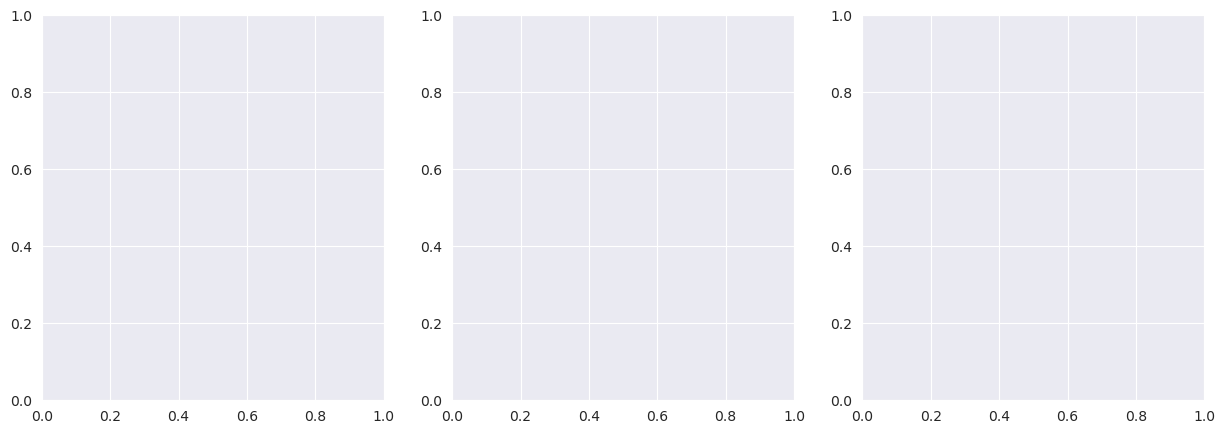

In [96]:
# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
X=scaler(X)

# Premier plot
axs[0].plot(X[["Electricity_nuclear"]], Y, "o")
axs[0].set_xlabel("Electricity from nuclear (TWh)")
axs[0].set_ylabel("CO2_emissions")
r2_nuclear = r2_score(Y, X["Electricity_nuclear"])
mse_nuclear = mean_squared_error(Y, X["Electricity_nuclear"])
axs[0].set_title("R2 = " + str(r2_nuclear) + ", MSE = " + str(mse_nuclear))

# Deuxième plot
axs[1].plot(X[["Electricity_renewables"]], Y, "o")
axs[1].set_xlabel("Electricity_renewables")
axs[1].set_ylabel("CO2_emissions")
r2_renewables = r2_score(Y, X["Electricity_renewables"])
mse_renewables = mean_squared_error(Y, X["Electricity_renewables"])
axs[1].set_title("R2 = " + str(r2_renewables) + ", MSE = " + str(mse_renewables))

# Troisième plot
axs[2].plot(X[["Land_Area"]], Y, "o")
axs[2].set_xlabel("Land Area(Km2)")
axs[2].set_ylabel("CO2_emissions")
r2_land_area = r2_score(Y, X["Land_Area"])
mse_land_area = mean_squared_error(Y, X["Land_Area"])
axs[2].set_title("R2 = " + str(r2_land_area) + ", MSE = " + str(mse_land_area))

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


Ici, on a pris les 3 variables les plus corrélées avec la production de CO2, et on a essayé de représenter l'évolution de la production de CO2 en fonction de ces 3 variables.
On voit que la variable "Electricity from renewables", qui est la plus corrélée avec la production de CO2, permet d'obtenir le MSE le plus faible avec une valeur de 0,28 et qu'on arrive à expliquer 71,47% des données (R² = 0,7147).
Plus généralement, on constate que plus la corrélation augmente, meilleurs sont les résultats.

In [ ]:
"""
# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Premier plot
axs[0].plot(X_test[["Electricity from nuclear (TWh)"]], y_test, "o")
axs[0].set_xlabel("Electricity from nuclear (TWh)")
axs[0].set_ylabel("Value_co2_emissions_kt_by_country")
r2_nuclear = r2_score(y_test, X_test["Electricity from nuclear (TWh)"])
mse_nuclear = mean_squared_error(y_test, X_test["Electricity from nuclear (TWh)"])
axs[0].set_title("R2 = " + str(r2_nuclear) + ", MSE = " + str(mse_nuclear))

# Deuxième plot
axs[1].plot(X_test[["Electricity from renewables (TWh)"]], y_test, "o")
axs[1].set_xlabel("Electricity from renewables (TWh)")
axs[1].set_ylabel("Value_co2_emissions_kt_by_country")
r2_renewables = r2_score(y_test, X_test["Electricity from renewables (TWh)"])
mse_renewables = mean_squared_error(y_test, X_test["Electricity from renewables (TWh)"])
axs[1].set_title("R2 = " + str(r2_renewables) + ", MSE = " + str(mse_renewables))

# Troisième plot
axs[2].plot(X_test[["Land Area(Km2)"]], y_test, "o")
axs[2].set_xlabel("Land Area(Km2)")
axs[2].set_ylabel("Value_co2_emissions_kt_by_country")
r2_land_area = r2_score(y_test, X_test["Land Area(Km2)"])
mse_land_area = mean_squared_error(y_test, X_test["Land Area(Km2)"])
axs[2].set_title("R2 = " + str(r2_land_area) + ", MSE = " + str(mse_land_area))

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()
"""

In [ ]:
numeric_cols = glob_complet.select_dtypes(include=['float64', 'int64']).columns
glob_complet_num=glob_complet[numeric_cols]

# Modèle linéaire gaussien

In [ ]:
from sklearn import linear_model
import scipy.stats as stats

In [ ]:
regLasso = linear_model.LinearRegression()
regLasso.fit(X_train,y_train)

prev=regLasso.predict(X_test)
mse = mean_squared_error(prev, y_test)

# Affiche l'erreur quadratique moyenne (MSE) pour évaluer les performances du modèle
print("MSE =", mse)

# Calcul du coefficient de détermination (R2)
r2 = r2_score(y_test, prev)

# Affiche le coefficient de détermination (R2) pour évaluer les performances du modèle
print("R2 =", r2)

Nous avons commencé notre étape de prédiction avec le modele lineaire. On voit que pour l'étape de validation, le modele donne des résultats assez intéressant avec un MSE qui vaut 0.198 et R²=0.79. 

In [ ]:
residuals = y_test - prev

# Tracer l'histogramme des résidus
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogramme des résidus')
plt.xlabel('Résidu')
plt.ylabel('Fréquence')
plt.show()

# Test de normalité (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)

Nous avons essayé dans cette cellule de vérifier si le modèle est gaussien en regardant la distribution des résidues.

Le premier modèle à tester est un simple modèle linéaire Gaussien. On s'intéresse à savoir si des interactions sont à prendre en compte. Le modèle devient alors polynomial d'ordre 2 ou quadratique.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir la plage d'alphas
#alpha = np.arange(0.1, 2, 0.1)
alpha = [ 0.01, 0.1, 1, 10, 100]
# grille de valeurs du paramètre alpha à optimiser
param = [{"alpha": alpha}]
regLasso = GridSearchCV(linear_model.Lasso(), param, cv=10, n_jobs=-1)
regLassOpt = regLasso.fit(X_train, y_train)

# Afficher le paramètre optimal
print("Meilleur R2 =", regLassOpt.best_score_)
print("Meilleur paramètre =", regLassOpt.best_params_)


On essaye ici d'utiliser le critère Lasso pour avoir un modele plus parcimonieux. On effectue un grid search par validation croisée avec 10 folds pour optimiser le paramètre $\alpha$ 

In [ ]:
"""
# Transformer les données de test en utilisant le scaler ajusté aux données d'entraînement
X_test_scaled = scaler.inverse_transform(X_test)

# Transformer les étiquettes de test si nécessaire (dans ce cas, elles ne semblent pas être transformées)
# y_test_s = scaler.transform(y_test)

# Utiliser le modèle pour prédire
prev = regLassOpt.predict(X_test_scaled)
print(prev)
# Évaluer la performance du modèle
print("MSE =", mean_squared_error(prev, y_test))
print("R2 =", r2_score(y_test, prev))
"""

In [ ]:
prev=regLassOpt.predict(X_test)
# la performance du modèle optimale
print("MSE=",mean_squared_error(prev,y_test))
print("R2=",r2_score(y_test,prev))

In [ ]:
# Trace un nuage de points des valeurs prédites par rapport aux valeurs observées
plt.plot(prev,y_test,"o")
plt.xlabel("Value_co2_emissions_kt_by_country_pred")
plt.ylabel("Value_co2_emissions_kt_by_country_observee")
plt.show()

In [ ]:
# Trace un nuage de points des résidus par rapport aux valeurs prédites
plt.plot(prev,y_test-prev,"o")
plt.xlabel("Value_co2_emissions_kt_by_country_pred")
plt.ylabel("Value_co2_emissions_kt_by_country_observee")
plt.axhline(y = 0, color = 'r')
plt.show()

In [ ]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train,y_train)
model_lasso.coef_

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0 )) + 
      " variables et en supprime " +  str(sum(coef == 0)))

In [ ]:
# Sélection du meilleur paramètre de régularisation pour la régression Lasso avec validation croisée
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=10, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(X_train,y_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='dashed', color='red',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

In [ ]:
# Chemin de régularisation Lasso pour la sélection de coefficients
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train,y_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

In [ ]:
imp_coef = coef.sort_values()
"""plt.rcParams['figure.figsize'] = (8.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")
""" 
filtered_coef = imp_coef[~imp_coef.index.str.startswith('Year_') & (imp_coef.index != 'Year_2000')]

# Ajouter les coefficients de l'année 2000 à la liste filtrée
year_2000_coef = imp_coef[imp_coef.index == 'Year_2000']
final_coef = pd.concat([filtered_coef, year_2000_coef])
final_coef =final_coef.sort_values()
# Définir la taille du graphique
plt.rcParams['figure.figsize'] = (8.0, 5.0)

# Créer le graphique
final_coef.plot(kind="barh")
plt.title(u"Coefficients du modèle lasso")
plt.show()


Grâce à cette cellule, nous vérifions les 3 variables que Lasso a supprimé sont "Latitude", "Land Area" et "Access to electricity". On voit aussi que les variables le plus significatives sont "Electricity from renewables", "Electricity from nuclear" 
et "Low-Carbon electricity". 

In [ ]:
# la performance du modèle optimale
print("MSE=",mean_squared_error(prev,y_test))
print("R2=",r2_score(y_test,prev))

In [ ]:
plt.plot(prev,y_test,"o")
x = np.linspace(0,12,100)
plt.plot(x, x,"r")
plt.xlabel(u"Value_co2_emissions_kt_by_country_ prédites")
plt.ylabel(u"Value_co2_emissions_kt_by_country observée")
plt.hlines(6,0,12)
plt.vlines(6,0,12)
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Optimisation de k
# grille de valeurs
param_grid=[{"n_neighbors":np.arange(1,15)}]
knn=GridSearchCV(KNeighborsRegressor(),param_grid,cv=10,n_jobs=-1)
knnOpt=knn.fit(X_train, y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (knnOpt.best_score_,knnOpt.best_params_))

Ensuite, nous nous intéressons à la méthode de K-nn. Nous optimisons le paramétre de nombre de voisins à considérer pour la méthode avec une validation croisée pour 10 folds. Un nombre de voisins inapproprié peut entraîner un surajustement (lorsque k est trop petit) ou un sous-ajustement (lorsque k est trop grand). En optimisant ce paramètre à l'aide de la validation croisée, nous recherchons le nombre de voisins qui offre les meilleures performances prédictives sur des données non vues, ce qui contribue à améliorer la généralisation du modèle. Dans notre cas, nous prenons un seul voisin donc nous avons l'impression que on est dans un cas de overfitting.

In [ ]:
y_chap = knnOpt.predict(X_test)

# erreur de prévision sur le test
print("erreur de prévision: ",knnOpt.score(X_test,y_test))
print("Score MSE: ",mean_squared_error(y_chap,y_test))
# score R2
r2 = r2_score(y_test, y_chap)
print("R² du modéle optimale:", r2)

Pour l'étape de validation, on voit que notre modèle donne des résultats trés efficaces vu qu'on explique 98% de données et qu'on a score MSE trés faible avec MSE = 0.015. Cela nous permet de confirmer qu'on est pas dans un cas de overfitting.

In [ ]:
# Prévision de l'échantillon test
y_chap = knnOpt.predict(X_test)
# matrice de confusion
#table=pd.crosstab(y_chap,y_test)
#print(table)
# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_chap))
print("RMSE :", rmse)

## SVM

In [ ]:
from sklearn.svm import SVR
svmOpt=SVR(kernel='linear').fit(X_train, y_train)
y_chap = svmOpt.predict(X_test)

# erreur de prévision sur le test
print("R² du modéle optimale: ",svmOpt.score(X_test,y_test))
print("Score MSE", mean_squared_error(y_test, y_chap))

On commence avec un SVR basé sur un kernel linéaire mais on voit que les résultat des prédictions sont pas intéressante
vu qu'on explique seulement 77% des données.
Ainsi on va essayer de tester les autres kernels.

In [ ]:
list = ['linear', 'poly', 'rbf', 'sigmoid']
params = [{'C': np.arange(0.1, 1.8, 0.1)}]
for kernel in list :
    svm= GridSearchCV(SVR(kernel=kernel),params,cv=10,n_jobs=-1)
    svmOpt=svm.fit(X_train, y_train)
    # paramètre optimal
    print("kernel = ",kernel)
    print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))

Avec cette cellule ce qu'on peut voir c'est que le kernel polynomial permet d'obtenir le meilleur score.
On va donc essayer d'optimiser les paramètres Gamma et C pour le kernel polynomial.      

In [ ]:
from sklearn.svm import SVR
list = ['poly']
params = [{"C": np.arange(0.1,1.3, 0.1), 'gamma' : np.arange(0.1,1.3,0.1)}]
for kernel in list :
    svm= GridSearchCV(SVR(kernel=kernel, C=1.6),params,cv=10,n_jobs=-1)
    svmOpt=svm.fit(X_train, y_train)
    # paramètre optimal
    print("kernel = ",kernel)
    print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))
    
    

On voit qu'en optimisant les deux paramètres C et Gamma pour le kernel linéarie, qu 'on obtient une valeure différente pour C et qu'on a quasiment le même score trouvé sans optimiser Gammma.


In [ ]:
y_chap = svmOpt.predict(X_test)
# erreur de prévision sur le test
print("erreur de prévision: ",mean_squared_error(y_chap,y_test))
# score R2
r2 = r2_score(y_test, y_chap)
print("R² du modéle optimale:", r2)

En appliquant notre modéle sur l'échatillon du test, on trouve un score R² encore plus important qui vaut 99,39% que celui trouvé avec l'échantillon d'apprentissage. De plus, le modèle donne une erreur de prévision trés faible à l'ordre de $10^{-3}$

In [ ]:
plt.plot(y_chap,y_test,"o")
x = np.linspace(0,12,100)
plt.plot(x, x,"r")
plt.xlabel(u"Value_co2_emissions_kt_by_country_ prédites")
plt.ylabel(u"Value_co2_emissions_kt_by_country observée")
plt.hlines(6,0,12)
plt.vlines(6,0,12)
plt.show()

Tout les points semble à peu près aligner avec la droite y=x donc ce graphe nous permet de nous assurer que la marge d'erreur entre la valeur prédite est observé est quasi nul.


## Arbre binaire de décision (CART)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":np.arange(1,10,1)}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (treeOpt.best_score_,treeOpt.best_params_))

In [ ]:
# Estimation de l'erreur de prévision
treeOpt.score(X_test,y_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
"""
param_grid = [
    {'max_depth': np.arange(1, 10), 'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],'criterion':['squared_error','friedman_mse'] }
]
"""
param = [{
    "max_depth": np.arange(1, 10),
    "min_samples_split": range(2, 10),
    "min_samples_leaf": range(1, 10),
    "max_features": ['auto', 'sqrt', 'log2', None]
}]
# Créer un objet GridSearchCV
tree = GridSearchCV(DecisionTreeRegressor(), param, cv=10, n_jobs=-1)

# Ajuster GridSearchCV aux données d'entraînement
treeOpt = tree.fit(X_train, y_train)



In [ ]:
# Afficher les meilleurs paramètres et le meilleur score
print("Meilleur score R² =", treeOpt.best_score_)
best_params = treeOpt.best_params_

print("Profondeur optimale (max_depth) =", best_params.get('max_depth'))
print("Nombre de features optimal =", best_params.get('max_features'))
print("Nombre minimal d'échantillons par feuille =", best_params.get('min_samples_leaf'))
print("Nombre minimal d'échantillons pour splitter un noeud =", best_params.get('min_samples_split'))

In [ ]:
# Estimation de l'erreur de prévision
treeOpt.score(X_test,y_test)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Création de l'arbre avec la profondeur optimale
best_tree = DecisionTreeRegressor(**treeOpt.best_params_)
best_tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))  
plot_tree(best_tree, feature_names=X_train.columns.tolist(), fontsize=10, max_depth=2) 
plt.savefig('arbre_decision.png')
plt.show()


In [ ]:
y_chap = treeOpt.predict(X_test)

# erreur de prévision sur le test
print("erreur de prévision: ",treeOpt.score(X_test,y_test))
print("Score MSE: ",mean_squared_error(y_chap,y_test))
# score R2
r2 = r2_score(y_test, y_chap)
print("R² du modéle optimale:", r2)


## Forêts aléatoires

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import confusion_matrix
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
   criterion='squared_error', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)

# apprentissage
rfFit = forest.fit(X_train,y_train)
# erreur de prévision sur le test (erreur out-of-bag)
print(rfFit.oob_score_)


In [ ]:
print(len(rfFit.feature_importances_))


Dans cette partie, nous essayons de tester la méthode de Random Forest sans l'optimiser en prenant 500 arbre de regression et la méthode oob_score_ pour évaluer l'erreur de prédiction sur l'ensemble de données de test en utilisant la méthode de validation out-of-bag. Ici le résultat correspond au score R² qui vaut 0.97  

In [ ]:
# prévision
y_chap = rfFit.predict(X_test)

# erreur de prévision sur le test
print("Score MSE: ",mean_squared_error(y_chap,y_test))
# score R2
r2 = r2_score(y_test, y_chap)
print("R² du modéle optimale:", r2)

Nous testons notre modéle sur l'échantillon de test et on voit que avec le modèle non optimisé, on a un ajustement trés important avec un score R²=0.98. De plus, on voit que l'erreur est tres faible vu que le score MSE est 0.011

In [ ]:
# Importance des variables
importance_rfFit = pd.Series(rfFit.feature_importances_, index=X_test.columns).sort_values(ascending=False)
print(importance_rfFit)


# Affichage de l'importance des variables
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
importance_rfFit.plot(kind='bar')
plt.title('Importance des variables pour rfFit')


# Prédiction sur les données de test
pred_rfr = rfFit.predict(X_test)

# Erreur quadratique moyenne de prévision
mse_rfr = mean_squared_error(y_test, pred_rfr)
print("Erreur quadratique moyenne de prévision pour rfFit:", mse_rfr)

# Matrice de confusion pour la prévision du dépassement de seuil (régression)
threshold = 150
confusion_matrix_rfFit = confusion_matrix(y_test > threshold, pred_rfr > threshold)
print("Matrice de confusion pour rfFit:\n", confusion_matrix_rfFit)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,max_features=2)
rfFit=rf.fit(X_train, y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(X_train.columns[indices[f]], importances[indices[f]])

Dans cette cellule, nous avons essayé d'afficher l'importance attribué à chaque variable par le modèle non optimisé de Random Forest. On voit que "Electricity from renewables" est la variable la plus significative ce qui est le cas pour le modèle linéaire sous la contrainte de Lasso.  

In [ ]:

rfFit.score(X_test,y_test)

In [ ]:
forest = RandomForestRegressor(n_estimators=500, 
   criterion='squared_error', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)

In [ ]:
#Optimisation par CV
import warnings
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Filtrer les avertissements spécifiques
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

param=[{"max_features":np.arange(1,10,1), 'n_estimators': [100]}]
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf= GridSearchCV(RandomForestRegressor(),
        param_grid,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
# Afficher les meilleurs paramètres et le meilleur score
print("Meilleur score R² =", rfOpt.best_score_)
best_params = rfOpt.best_params_

print("Profondeur optimale (max_depth) =", best_params.get('max_depth'))
print("Nombre de features optimal =", best_params.get('max_features'))
print("Nombre minimal d'échantillons par feuille =", best_params.get('min_samples_leaf'))
print("Nombre minimal d'échantillons pour splitter un noeud =", best_params.get('min_samples_split'))

In [ ]:
# Extraction des meilleurs paramètres et du meilleur score
best_score = rfOpt.best_score_
best_params = rfOpt.best_params_

# Affichage du meilleur score
print(f"Meilleur score = {best_score:.4f}")

# Affichage formaté des meilleurs paramètres
print("Meilleurs paramètres :")
print(f"Profondeur optimale = {best_params.get('max_depth')}")
print(f"Nombre optimal de features = {best_params.get('max_features')}")
print(f"Nombre minimal d'échantillons par feuille = {best_params.get('min_samples_leaf')}")
print(f"Nombre minimal d'échantillons pour splitter un nœud = {best_params.get('min_samples_split')}")
print(f"Nombre optimal d'estimateurs = {best_params.get('n_estimators')}")


In [ ]:
# erreur de prévision sur le test
rfOpt.score(X_test,y_test)

In [ ]:
# prévision
y_chap = rfOpt.predict(X_test)

# erreur de prévision sur le test
print("erreur de prévision: ",rfOpt.score(X_test,y_test))
print("Score MSE: ",mean_squared_error(y_chap,y_test))
# score R2
r2 = r2_score(y_test, y_chap)
print("R² du modéle optimale:", r2)

In [ ]:
# Préparation pour la visualisation
plt.figure(figsize=(10, 8))

importances = rfOpt.best_estimator_.feature_importances_
features = X_train.columns
# Créer un DataFrame des importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Identifier les features qui commencent par "Year_"
year_features = importances_df[importances_df['Feature'].str.startswith('Year_')]

# Calculer la somme des importances des features "Year_"
year_importance_sum = year_features['Importance'].sum()

# Créer une nouvelle entrée pour cette somme
summary_df = pd.DataFrame({'Feature': ['Year'], 'Importance': [year_importance_sum]})

# Filtrer les importances pour exclure les colonnes "Year_"
filtered_importances_df = importances_df[~importances_df['Feature'].str.startswith('Year_')]

# Concaténer la somme avec les autres importances
final_importances_df = pd.concat([filtered_importances_df, summary_df]).reset_index(drop=True)
# Trier par importance pour une meilleure visualisation
final_importances_df = final_importances_df.sort_values(by='Importance', ascending=False)

# Subplot 2: Barplot des importances filtrées et agrégées
plt.subplot(1, 2, 2)
plt.bar(final_importances_df['Feature'], final_importances_df['Importance'])
plt.title('Importance Filtrée et Agrégée des Features')
plt.xticks(rotation=90)

features = X_train.columns
importances = rfFit.feature_importances_

# Créer un DataFrame des importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Identifier les features qui commencent par "Year_"
year_features = importances_df[importances_df['Feature'].str.startswith('Year_')]

# Calculer la somme des importances des features "Year_"
year_importance_sum = year_features['Importance'].sum()

# Créer une nouvelle entrée pour cette somme
summary_df = pd.DataFrame({'Feature': ['Year'], 'Importance': [year_importance_sum]})

# Filtrer les importances pour exclure les colonnes "Year_"
filtered_importances_df = importances_df[~importances_df['Feature'].str.startswith('Year_')]

# Concaténer la somme avec les autres importances
final_importances_df = pd.concat([filtered_importances_df, summary_df]).reset_index(drop=True)

# Trier par importance pour une meilleure visualisation
final_importances_df = final_importances_df.sort_values(by='Importance', ascending=False)



# Subplot 1: Barplot des importances initiales
plt.subplot(1, 2, 1)
plt.bar(final_importances_df['Feature'], final_importances_df['Importance'])
plt.title('Importance Originale des Features')
plt.xticks( rotation=90)




plt.tight_layout()
plt.show()


In [ ]:
# Graphe des importances
importances = rfOpt.best_estimator_.feature_importances_

plt.subplot(1, 2, 1)
plt.title("Importance avec modèle optimal")
plt.bar(range(X_train.shape[1]), importances[indices]);
plt.xticks(range(X_train.shape[1]), X_train.columns[indices]);
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]]);
plt.subplot(1, 2, 2)
importances = rfFit.feature_importances_
plt.title("Importance avec modéle initiale")
plt.bar(range(X_train.shape[1]), importances[indices]);
plt.xticks(range(X_train.shape[1]), X_train.columns[indices]);
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]]);
plt.show()

r2 = r2_score(y_test, y_chap)
print("R² du modéle optimale:", r2)
pred = rfFit.predict(X_test)
r2 = r2_score(y_test, pred)
print("R² du modéle initiale:", r2)


# Poly

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline


polynomial_features = PolynomialFeatures(degree=2)

linear_regression = LinearRegression()

model = make_pipeline(polynomial_features, linear_regression)

model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE =", mse)

r2 = r2_score(y_test, y_pred)
print("R2 =", r2)


In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Paramètres à tester
parameters = {
    'poly__degree': [1, 2, 3, 4, 5],  # Tester différents degrés de polynômes
    'linear__fit_intercept': [True, False],  # Tester avec et sans intercept
      # Tester la normalisation
}

# Définir le score à optimiser, ici mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=10, scoring=mse_scorer, n_jobs=-1, verbose=1)

# Entraînement du modèle
grid_search.fit(X_train, y_train)

# Meilleur modèle
print("Meilleur degré polynomial :", grid_search.best_params_['poly__degree'])
print("Autres paramètres optimaux :", grid_search.best_params_)
print("Meilleur MSE :", -grid_search.best_score_)

### XGboost

In [ ]:
import xgboost as xgb

# Création du modèle XGBoost
boost_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.01)

# Entraînement du modèle
boost_reg.fit(X_train, y_train)

# Validation croisée
cv_result = xgb.cv(boost_reg.get_xgb_params(), xgb.DMatrix(X, label=y), nfold=10, metrics='rmse')
print(len(cv_result))
# Affichage de l'erreur de validation croisée
plt.plot(range(1, len(cv_result)+1), cv_result['test-rmse-mean'])
plt.xlabel('Nombre d\'itérations')
plt.ylabel('RMSE')
plt.title('Erreur de validation croisée')
plt.show()


In [ ]:
# Nombre optimal d'itérations
best_num_boost_rounds = len(cv_result)

# Entraîner le meilleur modèle avec le nombre optimal d'itérations
best_boost_reg = xgb.train(boost_reg.get_xgb_params(), xgb.DMatrix(X, label=y), num_boost_round=best_num_boost_rounds)

predictions = best_boost_reg.predict(xgb.DMatrix(X_test))

# Évaluer les performances du modèle sur l'ensemble de données de test
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("MSE sur l'ensemble de données de test:", mse)

# le coefficient de détermination (R²)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R² sur l'ensemble de données de test:", r2)

# Réseaux de neurones

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
param_grid=[{"hidden_layer_sizes":np.arange(90,101,1)}]
nnet= GridSearchCV(MLPRegressor(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

In [ ]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(X_test)

# erreur de prévision sur le test
print("erreur de prévision: ",mean_squared_error(y_chap,y_test))
# score R2
r2 = r2_score(y_test, y_chap)
print("R² du modéle optimale:", r2)

In [ ]:
 

from sklearn.metrics import r2_score, mean_squared_error

fig, axes = plt.subplots(3, 2, figsize=(12, 12)) # Créer une grille de sous-graphiques 3x2

listMethod = [["RF", rfOpt], ["NN", nnetOpt], ["Tree", treeOpt], ["K-nn", knnOpt], ["SVM", svmOpt]]

# Parcourir chaque méthode dans la liste
for i, (method_name, method_model) in enumerate(listMethod):
    print(i)
    # Calculer les prédictions
    y_chap = method_model.predict(X_test)
    # Calculer le score R2
    r2 = r2_score(y_test, y_chap)
    # Calculer l'erreur quadratique moyenne
    mse = mean_squared_error(y_test, y_chap)
    # Obtenir les indices de sous-graphiques pour cette méthode
    row = i // 2 # Ligne dans la grille
    col = i % 2 # Colonne dans la grille
    # Tracer les prédictions dans le sous-graphique correspondant
    x = np.linspace(0, 12, 100)
    axes[row, col].plot(x, x, "r")
    axes[row, col].scatter(y_chap, y_test, label=method_name)
    axes[row, col].set_xlabel("Value_co2_emissions_kt_by_country_ prédites")
    axes[row, col].hlines(6, 0, 12)
    axes[row, col].vlines(6, 0, 12)
    axes[row, col].set_ylabel("Value_co2_emissions_kt_by_country observée")
    axes[row, col].legend(loc="best")
    axes[row, col].set_title(f"{method_name}: R2={r2:.4f}, MSE={mse:.6f}")

plt.tight_layout() # Ajuster automatiquement les positions des sous-graphiques pour un affichage propre
plt.show()